In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import time
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 999)


%matplotlib inline

In [2]:
sample_out = pd.read_csv('../data/sampleSubmission.csv')
spray = pd.read_csv('../data/spray.csv')
kaggle_train = pd.read_csv('../data/train.csv')
kaggle_test = pd.read_csv('../data/test.csv')


In [3]:
weather = pd.read_csv('../data/weather.csv', skipinitialspace=True)

In [4]:
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [5]:
ll = []
for each in range(len(spray)):
    ll.append((spray.iloc[each,2], spray.iloc[each,3]))
spray['lat_long'] = ll
#spray.drop(['Longitude', 'Latitude'], axis = 1, inplace = True)

In [6]:
spray.dtypes

Date          object
Time          object
Latitude     float64
Longitude    float64
lat_long      object
dtype: object

In [7]:
#heat map of sprays / frequency over time?

In [8]:
#df.set_index('begins_at', inplace = True)
#df['begins_at'] = pd.to_datetime[df['begins_at']]

In [9]:
len(spray)

14835

In [10]:
spray = spray.drop_duplicates()   # These were 541 consecutive entries with the same time, longitude and latitude
spray[spray['Time'].isnull()]      # These are entries following the dropped records above with date, long, lat, but no time
spray['Time'].fillna('7:45:00 PM', inplace = True) #7:45 was in between missing values, assuming degress of time don't matter, 583 records impacted


In [11]:
spray['Date'] = pd.to_datetime(spray['Date']+' '+spray['Time'])
spray.drop(['Time'], axis = 1, inplace = True)
spray.isnull().sum()

Date         0
Latitude     0
Longitude    0
lat_long     0
dtype: int64

In [12]:
#spray.set_index('Date', drop = True, inplace = True)

In [13]:
spray.head()

,Date,Latitude,Longitude,lat_long
0,2011-08-29 18:56:58,42.391623,-88.089163,"(42.3916233333333, -88.0891633333333)"
1,2011-08-29 18:57:08,42.391348,-88.089163,"(42.3913483333333, -88.0891633333333)"
2,2011-08-29 18:57:18,42.391022,-88.089157,"(42.3910216666667, -88.0891566666667)"
3,2011-08-29 18:57:28,42.390637,-88.089158,"(42.3906366666667, -88.0891583333333)"
4,2011-08-29 18:57:38,42.390410,-88.088858,"(42.390409999999996, -88.0888583333333)"


In [14]:
spray.describe()

,Latitude,Longitude
count,14294.000000,14294.000000
mean,41.901739,-87.734512
std,0.105100,0.067599
min,41.713925,-88.096468
25%,41.782669,-87.789607
50%,41.937578,-87.724781
75%,41.977217,-87.692107
max,42.395983,-87.586727


---

> looks like lat & long have a reasonable range

---

In [15]:
kaggle_train.dtypes

Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
NumMosquitos                int64
WnvPresent                  int64
dtype: object

In [16]:
X_k_train = kaggle_train[['Date', 'Species', 'Trap', 'Latitude', 'Longitude', 'NumMosquitos','WnvPresent']]
X_cols = list(X_k_train.columns.drop(['WnvPresent','NumMosquitos']))
X_cols

['Date', 'Species', 'Trap', 'Latitude', 'Longitude']

In [17]:
X_k_train = X_k_train.groupby(X_cols, sort=False, as_index=False).agg({'NumMosquitos':'sum', 'WnvPresent':'max'}).reindex()

In [18]:
ll = []
for each in range(len(X_k_train)):
    ll.append((X_k_train.iloc[each,3], X_k_train.iloc[each,4]))
X_k_train['lat_long'] = ll

In [19]:
X_k_train['Date'] = pd.to_datetime(kaggle_train['Date'])

In [20]:
#X_k_train.set_index('Date', drop = True, inplace = True)

In [21]:
X_k_train.isnull().sum()

Date            0
Species         0
Trap            0
Latitude        0
Longitude       0
NumMosquitos    0
WnvPresent      0
lat_long        0
dtype: int64

In [22]:
X_k_train.dtypes

Date            datetime64[ns]
Species                 object
Trap                    object
Latitude               float64
Longitude              float64
NumMosquitos             int64
WnvPresent               int64
lat_long                object
dtype: object

In [23]:
#X_k_train[X_k_train['NumMosquitos'] >= 50]

In [24]:
#set(X_k_train.index)

In [25]:
# I think we should tag whether or not a trap is a satalite location.  
# I do not believe the data reflect an accurate location for those traps.

In [26]:
# Columns to include in X:  
# Date, Lat, Long, trap#, Satelite trap y/n, # mosquitos, WNV yes/no, mosq species (convert to #?)

In [27]:
# Should we do anything with address accuracy?

In [28]:
# Should we do anything with records that have 50 mosquitos 
# (data dictionary says observations were split if more than 50 mosquitos were in a trap)

In [29]:
Y_k = X_k_train['WnvPresent']
X_k_train.drop('WnvPresent', axis = 1, inplace =True)

In [30]:
kaggle_test.dtypes

Id                          int64
Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
dtype: object

In [31]:
kaggle_test.head()

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [32]:
X_k_test = kaggle_test[['Id', 'Date', 'Species', 'Trap', 'Latitude', 'Longitude']].copy()
ll = []
for each in range(len(X_k_test)):
    ll.append((X_k_test.iloc[each,4], X_k_test.iloc[each,5]))
X_k_test['lat_long'] = ll
X_k_test['Date'] = pd.to_datetime(X_k_test['Date'])
#X_k_test.set_index('Date', drop = True, inplace = True)

In [33]:
X_k_test.head()

,Id,Date,Species,Trap,Latitude,Longitude,lat_long
0,1,2008-06-11,CULEX PIPIENS/RESTUANS,T002,41.95469,-87.800991,"(41.95469, -87.800991)"
1,2,2008-06-11,CULEX RESTUANS,T002,41.95469,-87.800991,"(41.95469, -87.800991)"
2,3,2008-06-11,CULEX PIPIENS,T002,41.95469,-87.800991,"(41.95469, -87.800991)"
3,4,2008-06-11,CULEX SALINARIUS,T002,41.95469,-87.800991,"(41.95469, -87.800991)"
4,5,2008-06-11,CULEX TERRITANS,T002,41.95469,-87.800991,"(41.95469, -87.800991)"


In [34]:
X_k_test.isnull().sum()

Id           0
Date         0
Species      0
Trap         0
Latitude     0
Longitude    0
lat_long     0
dtype: int64

In [35]:
X_k_test.describe()

,Id,Latitude,Longitude
count,116293.000000,116293.000000,116293.000000
mean,58147.000000,41.849389,-87.693658
std,33571.041765,0.106593,0.080699
min,1.000000,41.644612,-87.930995
25%,29074.000000,41.753411,-87.750938
50%,58147.000000,41.862292,-87.694991
75%,87220.000000,41.951866,-87.648860
max,116293.000000,42.017430,-87.531635


In [36]:
#set(X_k_test.index)

In [37]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,0448,1849,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,-,-,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,0447,1850,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,-,-,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,0446,1851,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [38]:
# convert station to long / lat?  
#Station 1: CHICAGO O'HARE INTERNATIONAL AIRPORT Lat: 41.995 Lon: -87.933 Elev: 662 ft. above sea level
#Station 2: CHICAGO MIDWAY INTL ARPT Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level

# should we find the elevation of the various long/lat and engineer a new feature?

In [39]:
weather.isnull().sum()

Station        0
Date           0
Tmax           0
Tmin           0
Tavg           0
Depart         0
DewPoint       0
WetBulb        0
Heat           0
Cool           0
Sunrise        0
Sunset         0
CodeSum        0
Depth          0
Water1         0
SnowFall       0
PrecipTotal    0
StnPressure    0
SeaLevel       0
ResultSpeed    0
ResultDir      0
AvgSpeed       0
dtype: int64

In [40]:
weather.dtypes

Station          int64
Date            object
Tmax             int64
Tmin             int64
Tavg            object
Depart          object
DewPoint         int64
WetBulb         object
Heat            object
Cool            object
Sunrise         object
Sunset          object
CodeSum         object
Depth           object
Water1          object
SnowFall        object
PrecipTotal     object
StnPressure     object
SeaLevel        object
ResultSpeed    float64
ResultDir        int64
AvgSpeed        object
dtype: object

In [41]:
weather['Date'] = pd.to_datetime(weather['Date'])

In [42]:
# missing values labeled 'M' in Heat, Cool, Depth, Water1, SnowFall, SeaLevel, 

In [43]:
def custom_replace(df_in, col_in, bad_val, new_val):
    # replace bad_val with new_val in df_in, col_in
    print(col_in)
    df_in.loc[df_in[col_in] == bad_val, col_in] = new_val
    return(df_in)

In [44]:
cols = []
for each in weather.columns:
    if weather[[each]].dtypes[0] == 'object':
        cols.append(each)
cols.remove('CodeSum')

In [45]:
print(cols)

['Tavg', 'Depart', 'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'Depth', 'Water1', 'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel', 'AvgSpeed']


In [46]:
for each in cols:
    weather = custom_replace(weather, each, 'M', -999)

Tavg
Depart
WetBulb
Heat
Cool
Sunrise
Sunset
Depth
Water1
SnowFall
PrecipTotal
StnPressure
SeaLevel
AvgSpeed


In [47]:
cols = []
for each in weather.columns:
    if weather[[each]].dtypes[0] == 'object':
        cols.append(each)
cols.remove('CodeSum')
print(cols)

['Tavg', 'Depart', 'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'Depth', 'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel', 'AvgSpeed']


In [48]:
for each in cols:
    weather = custom_replace(weather, each, 'T', 0.01)
    
for each in cols:
    weather = custom_replace(weather, each, '  T', 0.01)
    
for each in cols:
    weather = custom_replace(weather, each, '-', -999)
    
for each in cols:
    weather[each] = pd.to_numeric(weather[each])

Tavg
Depart
WetBulb
Heat
Cool
Sunrise
Sunset
Depth
SnowFall
PrecipTotal
StnPressure
SeaLevel
AvgSpeed
Tavg
Depart
WetBulb
Heat
Cool
Sunrise
Sunset
Depth
SnowFall
PrecipTotal
StnPressure
SeaLevel
AvgSpeed
Tavg
Depart
WetBulb
Heat
Cool
Sunrise
Sunset
Depth
SnowFall
PrecipTotal
StnPressure
SeaLevel
AvgSpeed


In [49]:
weather.dtypes

Station                 int64
Date           datetime64[ns]
Tmax                    int64
Tmin                    int64
Tavg                    int64
Depart                  int64
DewPoint                int64
WetBulb                 int64
Heat                    int64
Cool                    int64
Sunrise                 int64
Sunset                  int64
CodeSum                object
Depth                   int64
Water1                  int64
SnowFall              float64
PrecipTotal           float64
StnPressure           float64
SeaLevel              float64
ResultSpeed           float64
ResultDir               int64
AvgSpeed              float64
dtype: object

In [50]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,448,1849,,0,-999,0.0,0.0,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,-999,51,57,0,3,-999,-999,,-999,-999,-999.0,0.0,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,447,1850,BR,0,-999,0.0,0.0,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,-999,42,47,13,0,-999,-999,BR HZ,-999,-999,-999.0,0.0,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,446,1851,,0,-999,0.0,0.0,29.39,30.12,11.7,7,11.9


In [51]:
weather['CodeSum'].value_counts()

                         1609
RA                        296
RA BR                     238
BR                        110
TSRA RA BR                 92
BR HZ                      81
RA DZ BR                   65
TSRA RA                    43
HZ                         39
RA BR HZ                   38
TSRA                       34
RA DZ                      22
TSRA BR                    21
TS TSRA RA BR              19
RA HZ                      16
TS RA                      13
TSRA RA BR HZ              12
DZ BR                      10
TS                         10
TS TSRA BR                 10
DZ BR HZ                    9
DZ                          8
TSRA BR HZ                  8
TS RA BR                    8
TS TSRA                     7
RA DZ BR HZ                 7
TS TSRA RA                  7
TS TSRA BR HZ               7
RA SN                       4
TSRA RA BR VCTS             4
TSRA HZ                     4
FG+ BR                      4
TS BR                       4
TSRA RA HZ

In [52]:
# CodeSum will need to be split and analyzed / feature engineered

In [53]:
'''
Found this online for heating degree day calcualtion example:
Anyway, consider a single day, let's say July 1st, when the outside air temperature was 16C throughout the entire day.  A constant temperature throughout an entire day is rather unlikely, I know, but degree days would be a lot easier to understand if the outside air temperature stayed the same...  So, throughout the entire day on July 1st, the outside air temperature (16C) was consistently 1 degree below the base temperature of the building (17C), and we can work out the heating degree days on that day like so:

1 degree * 1 day = 1 heating degree day on July 1st

If, on July 2nd, the outside temperature was 2 degrees below the base temperature, we'd have:

2 degrees * 1 day = 2 heating degree days on July 2nd

Let's look at July 3rd - this was a hotter day, and the outside air temperature was 17C, the same as the base temperature (i.e. 0 degrees below the base temperature).  This gives:

0 degrees * 1 day = 0 heating degree days on July 3nd

On July 4th it was warmer again: 19C.  Again, the number of degrees below the base temperature was zero, giving:

0 degrees * 1 day = 0 heating degree days on July 4th

'''

"\nFound this online for heating degree day calcualtion example:\nAnyway, consider a single day, let's say July 1st, when the outside air temperature was 16C throughout the entire day.  A constant temperature throughout an entire day is rather unlikely, I know, but degree days would be a lot easier to understand if the outside air temperature stayed the same...  So, throughout the entire day on July 1st, the outside air temperature (16C) was consistently 1 degree below the base temperature of the building (17C), and we can work out the heating degree days on that day like so:\n\n1 degree * 1 day = 1 heating degree day on July 1st\n\nIf, on July 2nd, the outside temperature was 2 degrees below the base temperature, we'd have:\n\n2 degrees * 1 day = 2 heating degree days on July 2nd\n\nLet's look at July 3rd - this was a hotter day, and the outside air temperature was 17C, the same as the base temperature (i.e. 0 degrees below the base temperature).  This gives:\n\n0 degrees * 1 day = 0 

In [54]:
a = X_k_train           # a for additional EDA
a['Y'] = Y_k

In [55]:
a.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            8465, 8466, 8467, 8468, 8469, 8470, 8471, 8472, 8473, 8474],
           dtype='int64', length=8475)

In [56]:
a.head()

,Date,Species,Trap,Latitude,Longitude,NumMosquitos,lat_long,Y
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.954690,-87.800991,1,"(41.95469, -87.800991)",0
1,2007-05-29,CULEX RESTUANS,T002,41.954690,-87.800991,1,"(41.95469, -87.800991)",0
2,2007-05-29,CULEX RESTUANS,T007,41.994991,-87.769279,1,"(41.994991, -87.769279)",0
3,2007-05-29,CULEX PIPIENS/RESTUANS,T015,41.974089,-87.824812,1,"(41.974089, -87.824812)",0
4,2007-05-29,CULEX RESTUANS,T015,41.974089,-87.824812,4,"(41.974089, -87.824812)",0


In [57]:
dt = '2007-5'
n, wn = a[a['Species']=='CULEX RESTUANS'][dt:dt].agg({'NumMosquitos':'sum', 'Y':'max'})

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.numeric.Int64Index'> with these indexers [2007-5] of <class 'str'>

In [308]:
print(n, wn)

29 0


In [295]:
traps = list(set(a['Trap']))
species = list(set(a['Species']))
years = [2007, 2009, 2011, 2013]
months = [5, 6, 7, 8, 9, 10]

In [317]:
b[b['Species']=='CULEX RESTAUNS']['2007-5':'2007-5'].agg({'NumMosquitos':'sum', 'Y':'max'})

NumMosquitos    0.0
Y               NaN
dtype: float64

In [323]:
table = []
for trap in traps:
    for year in years:
        for month in months:
            dt = str(year)+'-'+str(month)
            for spe in species:
                print(trap, year, month, spe)
                n, wnv = a[(a['Species']==spe) & (a['Trap'] == trap)][dt:dt].agg({'NumMosquitos':'sum', 'Y':'max'})
                list_out = [trap, year, month, spe, n, wnv]
                table.append(list_out)

T002 2007 5 CULEX SALINARIUS
T002 2007 5 CULEX TARSALIS
T002 2007 5 CULEX PIPIENS
T002 2007 5 CULEX RESTUANS
T002 2007 5 CULEX TERRITANS
T002 2007 5 CULEX ERRATICUS
T002 2007 5 CULEX PIPIENS/RESTUANS
T002 2007 6 CULEX SALINARIUS
T002 2007 6 CULEX TARSALIS
T002 2007 6 CULEX PIPIENS
T002 2007 6 CULEX RESTUANS
T002 2007 6 CULEX TERRITANS
T002 2007 6 CULEX ERRATICUS
T002 2007 6 CULEX PIPIENS/RESTUANS
T002 2007 7 CULEX SALINARIUS
T002 2007 7 CULEX TARSALIS
T002 2007 7 CULEX PIPIENS
T002 2007 7 CULEX RESTUANS
T002 2007 7 CULEX TERRITANS
T002 2007 7 CULEX ERRATICUS
T002 2007 7 CULEX PIPIENS/RESTUANS
T002 2007 8 CULEX SALINARIUS
T002 2007 8 CULEX TARSALIS
T002 2007 8 CULEX PIPIENS
T002 2007 8 CULEX RESTUANS
T002 2007 8 CULEX TERRITANS
T002 2007 8 CULEX ERRATICUS
T002 2007 8 CULEX PIPIENS/RESTUANS
T002 2007 9 CULEX SALINARIUS
T002 2007 9 CULEX TARSALIS
T002 2007 9 CULEX PIPIENS
T002 2007 9 CULEX RESTUANS
T002 2007 9 CULEX TERRITANS
T002 2007 9 CULEX ERRATICUS
T002 2007 9 CULEX PIPIENS/RESTUANS


T091 2013 5 CULEX TERRITANS
T091 2013 5 CULEX ERRATICUS
T091 2013 5 CULEX PIPIENS/RESTUANS
T091 2013 6 CULEX SALINARIUS
T091 2013 6 CULEX TARSALIS
T091 2013 6 CULEX PIPIENS
T091 2013 6 CULEX RESTUANS
T091 2013 6 CULEX TERRITANS
T091 2013 6 CULEX ERRATICUS
T091 2013 6 CULEX PIPIENS/RESTUANS
T091 2013 7 CULEX SALINARIUS
T091 2013 7 CULEX TARSALIS
T091 2013 7 CULEX PIPIENS
T091 2013 7 CULEX RESTUANS
T091 2013 7 CULEX TERRITANS
T091 2013 7 CULEX ERRATICUS
T091 2013 7 CULEX PIPIENS/RESTUANS
T091 2013 8 CULEX SALINARIUS
T091 2013 8 CULEX TARSALIS
T091 2013 8 CULEX PIPIENS
T091 2013 8 CULEX RESTUANS
T091 2013 8 CULEX TERRITANS
T091 2013 8 CULEX ERRATICUS
T091 2013 8 CULEX PIPIENS/RESTUANS
T091 2013 9 CULEX SALINARIUS
T091 2013 9 CULEX TARSALIS
T091 2013 9 CULEX PIPIENS
T091 2013 9 CULEX RESTUANS
T091 2013 9 CULEX TERRITANS
T091 2013 9 CULEX ERRATICUS
T091 2013 9 CULEX PIPIENS/RESTUANS
T091 2013 10 CULEX SALINARIUS
T091 2013 10 CULEX TARSALIS
T091 2013 10 CULEX PIPIENS
T091 2013 10 CULEX RESTU

T046 2011 9 CULEX RESTUANS
T046 2011 9 CULEX TERRITANS
T046 2011 9 CULEX ERRATICUS
T046 2011 9 CULEX PIPIENS/RESTUANS
T046 2011 10 CULEX SALINARIUS
T046 2011 10 CULEX TARSALIS
T046 2011 10 CULEX PIPIENS
T046 2011 10 CULEX RESTUANS
T046 2011 10 CULEX TERRITANS
T046 2011 10 CULEX ERRATICUS
T046 2011 10 CULEX PIPIENS/RESTUANS
T046 2013 5 CULEX SALINARIUS
T046 2013 5 CULEX TARSALIS
T046 2013 5 CULEX PIPIENS
T046 2013 5 CULEX RESTUANS
T046 2013 5 CULEX TERRITANS
T046 2013 5 CULEX ERRATICUS
T046 2013 5 CULEX PIPIENS/RESTUANS
T046 2013 6 CULEX SALINARIUS
T046 2013 6 CULEX TARSALIS
T046 2013 6 CULEX PIPIENS
T046 2013 6 CULEX RESTUANS
T046 2013 6 CULEX TERRITANS
T046 2013 6 CULEX ERRATICUS
T046 2013 6 CULEX PIPIENS/RESTUANS
T046 2013 7 CULEX SALINARIUS
T046 2013 7 CULEX TARSALIS
T046 2013 7 CULEX PIPIENS
T046 2013 7 CULEX RESTUANS
T046 2013 7 CULEX TERRITANS
T046 2013 7 CULEX ERRATICUS
T046 2013 7 CULEX PIPIENS/RESTUANS
T046 2013 8 CULEX SALINARIUS
T046 2013 8 CULEX TARSALIS
T046 2013 8 CULEX P

T115 2011 5 CULEX ERRATICUS
T115 2011 5 CULEX PIPIENS/RESTUANS
T115 2011 6 CULEX SALINARIUS
T115 2011 6 CULEX TARSALIS
T115 2011 6 CULEX PIPIENS
T115 2011 6 CULEX RESTUANS
T115 2011 6 CULEX TERRITANS
T115 2011 6 CULEX ERRATICUS
T115 2011 6 CULEX PIPIENS/RESTUANS
T115 2011 7 CULEX SALINARIUS
T115 2011 7 CULEX TARSALIS
T115 2011 7 CULEX PIPIENS
T115 2011 7 CULEX RESTUANS
T115 2011 7 CULEX TERRITANS
T115 2011 7 CULEX ERRATICUS
T115 2011 7 CULEX PIPIENS/RESTUANS
T115 2011 8 CULEX SALINARIUS
T115 2011 8 CULEX TARSALIS
T115 2011 8 CULEX PIPIENS
T115 2011 8 CULEX RESTUANS
T115 2011 8 CULEX TERRITANS
T115 2011 8 CULEX ERRATICUS
T115 2011 8 CULEX PIPIENS/RESTUANS
T115 2011 9 CULEX SALINARIUS
T115 2011 9 CULEX TARSALIS
T115 2011 9 CULEX PIPIENS
T115 2011 9 CULEX RESTUANS
T115 2011 9 CULEX TERRITANS
T115 2011 9 CULEX ERRATICUS
T115 2011 9 CULEX PIPIENS/RESTUANS
T115 2011 10 CULEX SALINARIUS
T115 2011 10 CULEX TARSALIS
T115 2011 10 CULEX PIPIENS
T115 2011 10 CULEX RESTUANS
T115 2011 10 CULEX TERRI

T037 2009 7 CULEX PIPIENS/RESTUANS
T037 2009 8 CULEX SALINARIUS
T037 2009 8 CULEX TARSALIS
T037 2009 8 CULEX PIPIENS
T037 2009 8 CULEX RESTUANS
T037 2009 8 CULEX TERRITANS
T037 2009 8 CULEX ERRATICUS
T037 2009 8 CULEX PIPIENS/RESTUANS
T037 2009 9 CULEX SALINARIUS
T037 2009 9 CULEX TARSALIS
T037 2009 9 CULEX PIPIENS
T037 2009 9 CULEX RESTUANS
T037 2009 9 CULEX TERRITANS
T037 2009 9 CULEX ERRATICUS
T037 2009 9 CULEX PIPIENS/RESTUANS
T037 2009 10 CULEX SALINARIUS
T037 2009 10 CULEX TARSALIS
T037 2009 10 CULEX PIPIENS
T037 2009 10 CULEX RESTUANS
T037 2009 10 CULEX TERRITANS
T037 2009 10 CULEX ERRATICUS
T037 2009 10 CULEX PIPIENS/RESTUANS
T037 2011 5 CULEX SALINARIUS
T037 2011 5 CULEX TARSALIS
T037 2011 5 CULEX PIPIENS
T037 2011 5 CULEX RESTUANS
T037 2011 5 CULEX TERRITANS
T037 2011 5 CULEX ERRATICUS
T037 2011 5 CULEX PIPIENS/RESTUANS
T037 2011 6 CULEX SALINARIUS
T037 2011 6 CULEX TARSALIS
T037 2011 6 CULEX PIPIENS
T037 2011 6 CULEX RESTUANS
T037 2011 6 CULEX TERRITANS
T037 2011 6 CULEX ERR

T004 2009 5 CULEX PIPIENS
T004 2009 5 CULEX RESTUANS
T004 2009 5 CULEX TERRITANS
T004 2009 5 CULEX ERRATICUS
T004 2009 5 CULEX PIPIENS/RESTUANS
T004 2009 6 CULEX SALINARIUS
T004 2009 6 CULEX TARSALIS
T004 2009 6 CULEX PIPIENS
T004 2009 6 CULEX RESTUANS
T004 2009 6 CULEX TERRITANS
T004 2009 6 CULEX ERRATICUS
T004 2009 6 CULEX PIPIENS/RESTUANS
T004 2009 7 CULEX SALINARIUS
T004 2009 7 CULEX TARSALIS
T004 2009 7 CULEX PIPIENS
T004 2009 7 CULEX RESTUANS
T004 2009 7 CULEX TERRITANS
T004 2009 7 CULEX ERRATICUS
T004 2009 7 CULEX PIPIENS/RESTUANS
T004 2009 8 CULEX SALINARIUS
T004 2009 8 CULEX TARSALIS
T004 2009 8 CULEX PIPIENS
T004 2009 8 CULEX RESTUANS
T004 2009 8 CULEX TERRITANS
T004 2009 8 CULEX ERRATICUS
T004 2009 8 CULEX PIPIENS/RESTUANS
T004 2009 9 CULEX SALINARIUS
T004 2009 9 CULEX TARSALIS
T004 2009 9 CULEX PIPIENS
T004 2009 9 CULEX RESTUANS
T004 2009 9 CULEX TERRITANS
T004 2009 9 CULEX ERRATICUS
T004 2009 9 CULEX PIPIENS/RESTUANS
T004 2009 10 CULEX SALINARIUS
T004 2009 10 CULEX TARSALI

T212 2007 6 CULEX RESTUANS
T212 2007 6 CULEX TERRITANS
T212 2007 6 CULEX ERRATICUS
T212 2007 6 CULEX PIPIENS/RESTUANS
T212 2007 7 CULEX SALINARIUS
T212 2007 7 CULEX TARSALIS
T212 2007 7 CULEX PIPIENS
T212 2007 7 CULEX RESTUANS
T212 2007 7 CULEX TERRITANS
T212 2007 7 CULEX ERRATICUS
T212 2007 7 CULEX PIPIENS/RESTUANS
T212 2007 8 CULEX SALINARIUS
T212 2007 8 CULEX TARSALIS
T212 2007 8 CULEX PIPIENS
T212 2007 8 CULEX RESTUANS
T212 2007 8 CULEX TERRITANS
T212 2007 8 CULEX ERRATICUS
T212 2007 8 CULEX PIPIENS/RESTUANS
T212 2007 9 CULEX SALINARIUS
T212 2007 9 CULEX TARSALIS
T212 2007 9 CULEX PIPIENS
T212 2007 9 CULEX RESTUANS
T212 2007 9 CULEX TERRITANS
T212 2007 9 CULEX ERRATICUS
T212 2007 9 CULEX PIPIENS/RESTUANS
T212 2007 10 CULEX SALINARIUS
T212 2007 10 CULEX TARSALIS
T212 2007 10 CULEX PIPIENS
T212 2007 10 CULEX RESTUANS
T212 2007 10 CULEX TERRITANS
T212 2007 10 CULEX ERRATICUS
T212 2007 10 CULEX PIPIENS/RESTUANS
T212 2009 5 CULEX SALINARIUS
T212 2009 5 CULEX TARSALIS
T212 2009 5 CULEX P

T088 2013 10 CULEX RESTUANS
T088 2013 10 CULEX TERRITANS
T088 2013 10 CULEX ERRATICUS
T088 2013 10 CULEX PIPIENS/RESTUANS
T018 2007 5 CULEX SALINARIUS
T018 2007 5 CULEX TARSALIS
T018 2007 5 CULEX PIPIENS
T018 2007 5 CULEX RESTUANS
T018 2007 5 CULEX TERRITANS
T018 2007 5 CULEX ERRATICUS
T018 2007 5 CULEX PIPIENS/RESTUANS
T018 2007 6 CULEX SALINARIUS
T018 2007 6 CULEX TARSALIS
T018 2007 6 CULEX PIPIENS
T018 2007 6 CULEX RESTUANS
T018 2007 6 CULEX TERRITANS
T018 2007 6 CULEX ERRATICUS
T018 2007 6 CULEX PIPIENS/RESTUANS
T018 2007 7 CULEX SALINARIUS
T018 2007 7 CULEX TARSALIS
T018 2007 7 CULEX PIPIENS
T018 2007 7 CULEX RESTUANS
T018 2007 7 CULEX TERRITANS
T018 2007 7 CULEX ERRATICUS
T018 2007 7 CULEX PIPIENS/RESTUANS
T018 2007 8 CULEX SALINARIUS
T018 2007 8 CULEX TARSALIS
T018 2007 8 CULEX PIPIENS
T018 2007 8 CULEX RESTUANS
T018 2007 8 CULEX TERRITANS
T018 2007 8 CULEX ERRATICUS
T018 2007 8 CULEX PIPIENS/RESTUANS
T018 2007 9 CULEX SALINARIUS
T018 2007 9 CULEX TARSALIS
T018 2007 9 CULEX PIPI

T218 2013 7 CULEX PIPIENS
T218 2013 7 CULEX RESTUANS
T218 2013 7 CULEX TERRITANS
T218 2013 7 CULEX ERRATICUS
T218 2013 7 CULEX PIPIENS/RESTUANS
T218 2013 8 CULEX SALINARIUS
T218 2013 8 CULEX TARSALIS
T218 2013 8 CULEX PIPIENS
T218 2013 8 CULEX RESTUANS
T218 2013 8 CULEX TERRITANS
T218 2013 8 CULEX ERRATICUS
T218 2013 8 CULEX PIPIENS/RESTUANS
T218 2013 9 CULEX SALINARIUS
T218 2013 9 CULEX TARSALIS
T218 2013 9 CULEX PIPIENS
T218 2013 9 CULEX RESTUANS
T218 2013 9 CULEX TERRITANS
T218 2013 9 CULEX ERRATICUS
T218 2013 9 CULEX PIPIENS/RESTUANS
T218 2013 10 CULEX SALINARIUS
T218 2013 10 CULEX TARSALIS
T218 2013 10 CULEX PIPIENS
T218 2013 10 CULEX RESTUANS
T218 2013 10 CULEX TERRITANS
T218 2013 10 CULEX ERRATICUS
T218 2013 10 CULEX PIPIENS/RESTUANS
T079 2007 5 CULEX SALINARIUS
T079 2007 5 CULEX TARSALIS
T079 2007 5 CULEX PIPIENS
T079 2007 5 CULEX RESTUANS
T079 2007 5 CULEX TERRITANS
T079 2007 5 CULEX ERRATICUS
T079 2007 5 CULEX PIPIENS/RESTUANS
T079 2007 6 CULEX SALINARIUS
T079 2007 6 CULEX TA

T220 2011 9 CULEX RESTUANS
T220 2011 9 CULEX TERRITANS
T220 2011 9 CULEX ERRATICUS
T220 2011 9 CULEX PIPIENS/RESTUANS
T220 2011 10 CULEX SALINARIUS
T220 2011 10 CULEX TARSALIS
T220 2011 10 CULEX PIPIENS
T220 2011 10 CULEX RESTUANS
T220 2011 10 CULEX TERRITANS
T220 2011 10 CULEX ERRATICUS
T220 2011 10 CULEX PIPIENS/RESTUANS
T220 2013 5 CULEX SALINARIUS
T220 2013 5 CULEX TARSALIS
T220 2013 5 CULEX PIPIENS
T220 2013 5 CULEX RESTUANS
T220 2013 5 CULEX TERRITANS
T220 2013 5 CULEX ERRATICUS
T220 2013 5 CULEX PIPIENS/RESTUANS
T220 2013 6 CULEX SALINARIUS
T220 2013 6 CULEX TARSALIS
T220 2013 6 CULEX PIPIENS
T220 2013 6 CULEX RESTUANS
T220 2013 6 CULEX TERRITANS
T220 2013 6 CULEX ERRATICUS
T220 2013 6 CULEX PIPIENS/RESTUANS
T220 2013 7 CULEX SALINARIUS
T220 2013 7 CULEX TARSALIS
T220 2013 7 CULEX PIPIENS
T220 2013 7 CULEX RESTUANS
T220 2013 7 CULEX TERRITANS
T220 2013 7 CULEX ERRATICUS
T220 2013 7 CULEX PIPIENS/RESTUANS
T220 2013 8 CULEX SALINARIUS
T220 2013 8 CULEX TARSALIS
T220 2013 8 CULEX P

T006 2011 5 CULEX RESTUANS
T006 2011 5 CULEX TERRITANS
T006 2011 5 CULEX ERRATICUS
T006 2011 5 CULEX PIPIENS/RESTUANS
T006 2011 6 CULEX SALINARIUS
T006 2011 6 CULEX TARSALIS
T006 2011 6 CULEX PIPIENS
T006 2011 6 CULEX RESTUANS
T006 2011 6 CULEX TERRITANS
T006 2011 6 CULEX ERRATICUS
T006 2011 6 CULEX PIPIENS/RESTUANS
T006 2011 7 CULEX SALINARIUS
T006 2011 7 CULEX TARSALIS
T006 2011 7 CULEX PIPIENS
T006 2011 7 CULEX RESTUANS
T006 2011 7 CULEX TERRITANS
T006 2011 7 CULEX ERRATICUS
T006 2011 7 CULEX PIPIENS/RESTUANS
T006 2011 8 CULEX SALINARIUS
T006 2011 8 CULEX TARSALIS
T006 2011 8 CULEX PIPIENS
T006 2011 8 CULEX RESTUANS
T006 2011 8 CULEX TERRITANS
T006 2011 8 CULEX ERRATICUS
T006 2011 8 CULEX PIPIENS/RESTUANS
T006 2011 9 CULEX SALINARIUS
T006 2011 9 CULEX TARSALIS
T006 2011 9 CULEX PIPIENS
T006 2011 9 CULEX RESTUANS
T006 2011 9 CULEX TERRITANS
T006 2011 9 CULEX ERRATICUS
T006 2011 9 CULEX PIPIENS/RESTUANS
T006 2011 10 CULEX SALINARIUS
T006 2011 10 CULEX TARSALIS
T006 2011 10 CULEX PIPIE

T096 2009 8 CULEX RESTUANS
T096 2009 8 CULEX TERRITANS
T096 2009 8 CULEX ERRATICUS
T096 2009 8 CULEX PIPIENS/RESTUANS
T096 2009 9 CULEX SALINARIUS
T096 2009 9 CULEX TARSALIS
T096 2009 9 CULEX PIPIENS
T096 2009 9 CULEX RESTUANS
T096 2009 9 CULEX TERRITANS
T096 2009 9 CULEX ERRATICUS
T096 2009 9 CULEX PIPIENS/RESTUANS
T096 2009 10 CULEX SALINARIUS
T096 2009 10 CULEX TARSALIS
T096 2009 10 CULEX PIPIENS
T096 2009 10 CULEX RESTUANS
T096 2009 10 CULEX TERRITANS
T096 2009 10 CULEX ERRATICUS
T096 2009 10 CULEX PIPIENS/RESTUANS
T096 2011 5 CULEX SALINARIUS
T096 2011 5 CULEX TARSALIS
T096 2011 5 CULEX PIPIENS
T096 2011 5 CULEX RESTUANS
T096 2011 5 CULEX TERRITANS
T096 2011 5 CULEX ERRATICUS
T096 2011 5 CULEX PIPIENS/RESTUANS
T096 2011 6 CULEX SALINARIUS
T096 2011 6 CULEX TARSALIS
T096 2011 6 CULEX PIPIENS
T096 2011 6 CULEX RESTUANS
T096 2011 6 CULEX TERRITANS
T096 2011 6 CULEX ERRATICUS
T096 2011 6 CULEX PIPIENS/RESTUANS
T096 2011 7 CULEX SALINARIUS
T096 2011 7 CULEX TARSALIS
T096 2011 7 CULEX P

T160 2007 8 CULEX SALINARIUS
T160 2007 8 CULEX TARSALIS
T160 2007 8 CULEX PIPIENS
T160 2007 8 CULEX RESTUANS
T160 2007 8 CULEX TERRITANS
T160 2007 8 CULEX ERRATICUS
T160 2007 8 CULEX PIPIENS/RESTUANS
T160 2007 9 CULEX SALINARIUS
T160 2007 9 CULEX TARSALIS
T160 2007 9 CULEX PIPIENS
T160 2007 9 CULEX RESTUANS
T160 2007 9 CULEX TERRITANS
T160 2007 9 CULEX ERRATICUS
T160 2007 9 CULEX PIPIENS/RESTUANS
T160 2007 10 CULEX SALINARIUS
T160 2007 10 CULEX TARSALIS
T160 2007 10 CULEX PIPIENS
T160 2007 10 CULEX RESTUANS
T160 2007 10 CULEX TERRITANS
T160 2007 10 CULEX ERRATICUS
T160 2007 10 CULEX PIPIENS/RESTUANS
T160 2009 5 CULEX SALINARIUS
T160 2009 5 CULEX TARSALIS
T160 2009 5 CULEX PIPIENS
T160 2009 5 CULEX RESTUANS
T160 2009 5 CULEX TERRITANS
T160 2009 5 CULEX ERRATICUS
T160 2009 5 CULEX PIPIENS/RESTUANS
T160 2009 6 CULEX SALINARIUS
T160 2009 6 CULEX TARSALIS
T160 2009 6 CULEX PIPIENS
T160 2009 6 CULEX RESTUANS
T160 2009 6 CULEX TERRITANS
T160 2009 6 CULEX ERRATICUS
T160 2009 6 CULEX PIPIENS/RE

T235 2013 7 CULEX SALINARIUS
T235 2013 7 CULEX TARSALIS
T235 2013 7 CULEX PIPIENS
T235 2013 7 CULEX RESTUANS
T235 2013 7 CULEX TERRITANS
T235 2013 7 CULEX ERRATICUS
T235 2013 7 CULEX PIPIENS/RESTUANS
T235 2013 8 CULEX SALINARIUS
T235 2013 8 CULEX TARSALIS
T235 2013 8 CULEX PIPIENS
T235 2013 8 CULEX RESTUANS
T235 2013 8 CULEX TERRITANS
T235 2013 8 CULEX ERRATICUS
T235 2013 8 CULEX PIPIENS/RESTUANS
T235 2013 9 CULEX SALINARIUS
T235 2013 9 CULEX TARSALIS
T235 2013 9 CULEX PIPIENS
T235 2013 9 CULEX RESTUANS
T235 2013 9 CULEX TERRITANS
T235 2013 9 CULEX ERRATICUS
T235 2013 9 CULEX PIPIENS/RESTUANS
T235 2013 10 CULEX SALINARIUS
T235 2013 10 CULEX TARSALIS
T235 2013 10 CULEX PIPIENS
T235 2013 10 CULEX RESTUANS
T235 2013 10 CULEX TERRITANS
T235 2013 10 CULEX ERRATICUS
T235 2013 10 CULEX PIPIENS/RESTUANS
T031 2007 5 CULEX SALINARIUS
T031 2007 5 CULEX TARSALIS
T031 2007 5 CULEX PIPIENS
T031 2007 5 CULEX RESTUANS
T031 2007 5 CULEX TERRITANS
T031 2007 5 CULEX ERRATICUS
T031 2007 5 CULEX PIPIENS/RE

T005 2011 7 CULEX PIPIENS/RESTUANS
T005 2011 8 CULEX SALINARIUS
T005 2011 8 CULEX TARSALIS
T005 2011 8 CULEX PIPIENS
T005 2011 8 CULEX RESTUANS
T005 2011 8 CULEX TERRITANS
T005 2011 8 CULEX ERRATICUS
T005 2011 8 CULEX PIPIENS/RESTUANS
T005 2011 9 CULEX SALINARIUS
T005 2011 9 CULEX TARSALIS
T005 2011 9 CULEX PIPIENS
T005 2011 9 CULEX RESTUANS
T005 2011 9 CULEX TERRITANS
T005 2011 9 CULEX ERRATICUS
T005 2011 9 CULEX PIPIENS/RESTUANS
T005 2011 10 CULEX SALINARIUS
T005 2011 10 CULEX TARSALIS
T005 2011 10 CULEX PIPIENS
T005 2011 10 CULEX RESTUANS
T005 2011 10 CULEX TERRITANS
T005 2011 10 CULEX ERRATICUS
T005 2011 10 CULEX PIPIENS/RESTUANS
T005 2013 5 CULEX SALINARIUS
T005 2013 5 CULEX TARSALIS
T005 2013 5 CULEX PIPIENS
T005 2013 5 CULEX RESTUANS
T005 2013 5 CULEX TERRITANS
T005 2013 5 CULEX ERRATICUS
T005 2013 5 CULEX PIPIENS/RESTUANS
T005 2013 6 CULEX SALINARIUS
T005 2013 6 CULEX TARSALIS
T005 2013 6 CULEX PIPIENS
T005 2013 6 CULEX RESTUANS
T005 2013 6 CULEX TERRITANS
T005 2013 6 CULEX ERR

T027 2009 6 CULEX TERRITANS
T027 2009 6 CULEX ERRATICUS
T027 2009 6 CULEX PIPIENS/RESTUANS
T027 2009 7 CULEX SALINARIUS
T027 2009 7 CULEX TARSALIS
T027 2009 7 CULEX PIPIENS
T027 2009 7 CULEX RESTUANS
T027 2009 7 CULEX TERRITANS
T027 2009 7 CULEX ERRATICUS
T027 2009 7 CULEX PIPIENS/RESTUANS
T027 2009 8 CULEX SALINARIUS
T027 2009 8 CULEX TARSALIS
T027 2009 8 CULEX PIPIENS
T027 2009 8 CULEX RESTUANS
T027 2009 8 CULEX TERRITANS
T027 2009 8 CULEX ERRATICUS
T027 2009 8 CULEX PIPIENS/RESTUANS
T027 2009 9 CULEX SALINARIUS
T027 2009 9 CULEX TARSALIS
T027 2009 9 CULEX PIPIENS
T027 2009 9 CULEX RESTUANS
T027 2009 9 CULEX TERRITANS
T027 2009 9 CULEX ERRATICUS
T027 2009 9 CULEX PIPIENS/RESTUANS
T027 2009 10 CULEX SALINARIUS
T027 2009 10 CULEX TARSALIS
T027 2009 10 CULEX PIPIENS
T027 2009 10 CULEX RESTUANS
T027 2009 10 CULEX TERRITANS
T027 2009 10 CULEX ERRATICUS
T027 2009 10 CULEX PIPIENS/RESTUANS
T027 2011 5 CULEX SALINARIUS
T027 2011 5 CULEX TARSALIS
T027 2011 5 CULEX PIPIENS
T027 2011 5 CULEX RE

T238 2007 9 CULEX PIPIENS
T238 2007 9 CULEX RESTUANS
T238 2007 9 CULEX TERRITANS
T238 2007 9 CULEX ERRATICUS
T238 2007 9 CULEX PIPIENS/RESTUANS
T238 2007 10 CULEX SALINARIUS
T238 2007 10 CULEX TARSALIS
T238 2007 10 CULEX PIPIENS
T238 2007 10 CULEX RESTUANS
T238 2007 10 CULEX TERRITANS
T238 2007 10 CULEX ERRATICUS
T238 2007 10 CULEX PIPIENS/RESTUANS
T238 2009 5 CULEX SALINARIUS
T238 2009 5 CULEX TARSALIS
T238 2009 5 CULEX PIPIENS
T238 2009 5 CULEX RESTUANS
T238 2009 5 CULEX TERRITANS
T238 2009 5 CULEX ERRATICUS
T238 2009 5 CULEX PIPIENS/RESTUANS
T238 2009 6 CULEX SALINARIUS
T238 2009 6 CULEX TARSALIS
T238 2009 6 CULEX PIPIENS
T238 2009 6 CULEX RESTUANS
T238 2009 6 CULEX TERRITANS
T238 2009 6 CULEX ERRATICUS
T238 2009 6 CULEX PIPIENS/RESTUANS
T238 2009 7 CULEX SALINARIUS
T238 2009 7 CULEX TARSALIS
T238 2009 7 CULEX PIPIENS
T238 2009 7 CULEX RESTUANS
T238 2009 7 CULEX TERRITANS
T238 2009 7 CULEX ERRATICUS
T238 2009 7 CULEX PIPIENS/RESTUANS
T238 2009 8 CULEX SALINARIUS
T238 2009 8 CULEX TA

T206 2013 10 CULEX SALINARIUS
T206 2013 10 CULEX TARSALIS
T206 2013 10 CULEX PIPIENS
T206 2013 10 CULEX RESTUANS
T206 2013 10 CULEX TERRITANS
T206 2013 10 CULEX ERRATICUS
T206 2013 10 CULEX PIPIENS/RESTUANS
T099 2007 5 CULEX SALINARIUS
T099 2007 5 CULEX TARSALIS
T099 2007 5 CULEX PIPIENS
T099 2007 5 CULEX RESTUANS
T099 2007 5 CULEX TERRITANS
T099 2007 5 CULEX ERRATICUS
T099 2007 5 CULEX PIPIENS/RESTUANS
T099 2007 6 CULEX SALINARIUS
T099 2007 6 CULEX TARSALIS
T099 2007 6 CULEX PIPIENS
T099 2007 6 CULEX RESTUANS
T099 2007 6 CULEX TERRITANS
T099 2007 6 CULEX ERRATICUS
T099 2007 6 CULEX PIPIENS/RESTUANS
T099 2007 7 CULEX SALINARIUS
T099 2007 7 CULEX TARSALIS
T099 2007 7 CULEX PIPIENS
T099 2007 7 CULEX RESTUANS
T099 2007 7 CULEX TERRITANS
T099 2007 7 CULEX ERRATICUS
T099 2007 7 CULEX PIPIENS/RESTUANS
T099 2007 8 CULEX SALINARIUS
T099 2007 8 CULEX TARSALIS
T099 2007 8 CULEX PIPIENS
T099 2007 8 CULEX RESTUANS
T099 2007 8 CULEX TERRITANS
T099 2007 8 CULEX ERRATICUS
T099 2007 8 CULEX PIPIENS/RE

T153 2013 6 CULEX PIPIENS
T153 2013 6 CULEX RESTUANS
T153 2013 6 CULEX TERRITANS
T153 2013 6 CULEX ERRATICUS
T153 2013 6 CULEX PIPIENS/RESTUANS
T153 2013 7 CULEX SALINARIUS
T153 2013 7 CULEX TARSALIS
T153 2013 7 CULEX PIPIENS
T153 2013 7 CULEX RESTUANS
T153 2013 7 CULEX TERRITANS
T153 2013 7 CULEX ERRATICUS
T153 2013 7 CULEX PIPIENS/RESTUANS
T153 2013 8 CULEX SALINARIUS
T153 2013 8 CULEX TARSALIS
T153 2013 8 CULEX PIPIENS
T153 2013 8 CULEX RESTUANS
T153 2013 8 CULEX TERRITANS
T153 2013 8 CULEX ERRATICUS
T153 2013 8 CULEX PIPIENS/RESTUANS
T153 2013 9 CULEX SALINARIUS
T153 2013 9 CULEX TARSALIS
T153 2013 9 CULEX PIPIENS
T153 2013 9 CULEX RESTUANS
T153 2013 9 CULEX TERRITANS
T153 2013 9 CULEX ERRATICUS
T153 2013 9 CULEX PIPIENS/RESTUANS
T153 2013 10 CULEX SALINARIUS
T153 2013 10 CULEX TARSALIS
T153 2013 10 CULEX PIPIENS
T153 2013 10 CULEX RESTUANS
T153 2013 10 CULEX TERRITANS
T153 2013 10 CULEX ERRATICUS
T153 2013 10 CULEX PIPIENS/RESTUANS
T148 2007 5 CULEX SALINARIUS
T148 2007 5 CULEX TA

T107 2011 8 CULEX PIPIENS
T107 2011 8 CULEX RESTUANS
T107 2011 8 CULEX TERRITANS
T107 2011 8 CULEX ERRATICUS
T107 2011 8 CULEX PIPIENS/RESTUANS
T107 2011 9 CULEX SALINARIUS
T107 2011 9 CULEX TARSALIS
T107 2011 9 CULEX PIPIENS
T107 2011 9 CULEX RESTUANS
T107 2011 9 CULEX TERRITANS
T107 2011 9 CULEX ERRATICUS
T107 2011 9 CULEX PIPIENS/RESTUANS
T107 2011 10 CULEX SALINARIUS
T107 2011 10 CULEX TARSALIS
T107 2011 10 CULEX PIPIENS
T107 2011 10 CULEX RESTUANS
T107 2011 10 CULEX TERRITANS
T107 2011 10 CULEX ERRATICUS
T107 2011 10 CULEX PIPIENS/RESTUANS
T107 2013 5 CULEX SALINARIUS
T107 2013 5 CULEX TARSALIS
T107 2013 5 CULEX PIPIENS
T107 2013 5 CULEX RESTUANS
T107 2013 5 CULEX TERRITANS
T107 2013 5 CULEX ERRATICUS
T107 2013 5 CULEX PIPIENS/RESTUANS
T107 2013 6 CULEX SALINARIUS
T107 2013 6 CULEX TARSALIS
T107 2013 6 CULEX PIPIENS
T107 2013 6 CULEX RESTUANS
T107 2013 6 CULEX TERRITANS
T107 2013 6 CULEX ERRATICUS
T107 2013 6 CULEX PIPIENS/RESTUANS
T107 2013 7 CULEX SALINARIUS
T107 2013 7 CULEX TA

T054C 2009 10 CULEX PIPIENS/RESTUANS
T054C 2011 5 CULEX SALINARIUS
T054C 2011 5 CULEX TARSALIS
T054C 2011 5 CULEX PIPIENS
T054C 2011 5 CULEX RESTUANS
T054C 2011 5 CULEX TERRITANS
T054C 2011 5 CULEX ERRATICUS
T054C 2011 5 CULEX PIPIENS/RESTUANS
T054C 2011 6 CULEX SALINARIUS
T054C 2011 6 CULEX TARSALIS
T054C 2011 6 CULEX PIPIENS
T054C 2011 6 CULEX RESTUANS
T054C 2011 6 CULEX TERRITANS
T054C 2011 6 CULEX ERRATICUS
T054C 2011 6 CULEX PIPIENS/RESTUANS
T054C 2011 7 CULEX SALINARIUS
T054C 2011 7 CULEX TARSALIS
T054C 2011 7 CULEX PIPIENS
T054C 2011 7 CULEX RESTUANS
T054C 2011 7 CULEX TERRITANS
T054C 2011 7 CULEX ERRATICUS
T054C 2011 7 CULEX PIPIENS/RESTUANS
T054C 2011 8 CULEX SALINARIUS
T054C 2011 8 CULEX TARSALIS
T054C 2011 8 CULEX PIPIENS
T054C 2011 8 CULEX RESTUANS
T054C 2011 8 CULEX TERRITANS
T054C 2011 8 CULEX ERRATICUS
T054C 2011 8 CULEX PIPIENS/RESTUANS
T054C 2011 9 CULEX SALINARIUS
T054C 2011 9 CULEX TARSALIS
T054C 2011 9 CULEX PIPIENS
T054C 2011 9 CULEX RESTUANS
T054C 2011 9 CULEX TER

T100 2009 8 CULEX RESTUANS
T100 2009 8 CULEX TERRITANS
T100 2009 8 CULEX ERRATICUS
T100 2009 8 CULEX PIPIENS/RESTUANS
T100 2009 9 CULEX SALINARIUS
T100 2009 9 CULEX TARSALIS
T100 2009 9 CULEX PIPIENS
T100 2009 9 CULEX RESTUANS
T100 2009 9 CULEX TERRITANS
T100 2009 9 CULEX ERRATICUS
T100 2009 9 CULEX PIPIENS/RESTUANS
T100 2009 10 CULEX SALINARIUS
T100 2009 10 CULEX TARSALIS
T100 2009 10 CULEX PIPIENS
T100 2009 10 CULEX RESTUANS
T100 2009 10 CULEX TERRITANS
T100 2009 10 CULEX ERRATICUS
T100 2009 10 CULEX PIPIENS/RESTUANS
T100 2011 5 CULEX SALINARIUS
T100 2011 5 CULEX TARSALIS
T100 2011 5 CULEX PIPIENS
T100 2011 5 CULEX RESTUANS
T100 2011 5 CULEX TERRITANS
T100 2011 5 CULEX ERRATICUS
T100 2011 5 CULEX PIPIENS/RESTUANS
T100 2011 6 CULEX SALINARIUS
T100 2011 6 CULEX TARSALIS
T100 2011 6 CULEX PIPIENS
T100 2011 6 CULEX RESTUANS
T100 2011 6 CULEX TERRITANS
T100 2011 6 CULEX ERRATICUS
T100 2011 6 CULEX PIPIENS/RESTUANS
T100 2011 7 CULEX SALINARIUS
T100 2011 7 CULEX TARSALIS
T100 2011 7 CULEX P

T161 2007 7 CULEX TARSALIS
T161 2007 7 CULEX PIPIENS
T161 2007 7 CULEX RESTUANS
T161 2007 7 CULEX TERRITANS
T161 2007 7 CULEX ERRATICUS
T161 2007 7 CULEX PIPIENS/RESTUANS
T161 2007 8 CULEX SALINARIUS
T161 2007 8 CULEX TARSALIS
T161 2007 8 CULEX PIPIENS
T161 2007 8 CULEX RESTUANS
T161 2007 8 CULEX TERRITANS
T161 2007 8 CULEX ERRATICUS
T161 2007 8 CULEX PIPIENS/RESTUANS
T161 2007 9 CULEX SALINARIUS
T161 2007 9 CULEX TARSALIS
T161 2007 9 CULEX PIPIENS
T161 2007 9 CULEX RESTUANS
T161 2007 9 CULEX TERRITANS
T161 2007 9 CULEX ERRATICUS
T161 2007 9 CULEX PIPIENS/RESTUANS
T161 2007 10 CULEX SALINARIUS
T161 2007 10 CULEX TARSALIS
T161 2007 10 CULEX PIPIENS
T161 2007 10 CULEX RESTUANS
T161 2007 10 CULEX TERRITANS
T161 2007 10 CULEX ERRATICUS
T161 2007 10 CULEX PIPIENS/RESTUANS
T161 2009 5 CULEX SALINARIUS
T161 2009 5 CULEX TARSALIS
T161 2009 5 CULEX PIPIENS
T161 2009 5 CULEX RESTUANS
T161 2009 5 CULEX TERRITANS
T161 2009 5 CULEX ERRATICUS
T161 2009 5 CULEX PIPIENS/RESTUANS
T161 2009 6 CULEX SALI

T071 2013 8 CULEX PIPIENS/RESTUANS
T071 2013 9 CULEX SALINARIUS
T071 2013 9 CULEX TARSALIS
T071 2013 9 CULEX PIPIENS
T071 2013 9 CULEX RESTUANS
T071 2013 9 CULEX TERRITANS
T071 2013 9 CULEX ERRATICUS
T071 2013 9 CULEX PIPIENS/RESTUANS
T071 2013 10 CULEX SALINARIUS
T071 2013 10 CULEX TARSALIS
T071 2013 10 CULEX PIPIENS
T071 2013 10 CULEX RESTUANS
T071 2013 10 CULEX TERRITANS
T071 2013 10 CULEX ERRATICUS
T071 2013 10 CULEX PIPIENS/RESTUANS
T003 2007 5 CULEX SALINARIUS
T003 2007 5 CULEX TARSALIS
T003 2007 5 CULEX PIPIENS
T003 2007 5 CULEX RESTUANS
T003 2007 5 CULEX TERRITANS
T003 2007 5 CULEX ERRATICUS
T003 2007 5 CULEX PIPIENS/RESTUANS
T003 2007 6 CULEX SALINARIUS
T003 2007 6 CULEX TARSALIS
T003 2007 6 CULEX PIPIENS
T003 2007 6 CULEX RESTUANS
T003 2007 6 CULEX TERRITANS
T003 2007 6 CULEX ERRATICUS
T003 2007 6 CULEX PIPIENS/RESTUANS
T003 2007 7 CULEX SALINARIUS
T003 2007 7 CULEX TARSALIS
T003 2007 7 CULEX PIPIENS
T003 2007 7 CULEX RESTUANS
T003 2007 7 CULEX TERRITANS
T003 2007 7 CULEX ERR

T013 2011 8 CULEX TARSALIS
T013 2011 8 CULEX PIPIENS
T013 2011 8 CULEX RESTUANS
T013 2011 8 CULEX TERRITANS
T013 2011 8 CULEX ERRATICUS
T013 2011 8 CULEX PIPIENS/RESTUANS
T013 2011 9 CULEX SALINARIUS
T013 2011 9 CULEX TARSALIS
T013 2011 9 CULEX PIPIENS
T013 2011 9 CULEX RESTUANS
T013 2011 9 CULEX TERRITANS
T013 2011 9 CULEX ERRATICUS
T013 2011 9 CULEX PIPIENS/RESTUANS
T013 2011 10 CULEX SALINARIUS
T013 2011 10 CULEX TARSALIS
T013 2011 10 CULEX PIPIENS
T013 2011 10 CULEX RESTUANS
T013 2011 10 CULEX TERRITANS
T013 2011 10 CULEX ERRATICUS
T013 2011 10 CULEX PIPIENS/RESTUANS
T013 2013 5 CULEX SALINARIUS
T013 2013 5 CULEX TARSALIS
T013 2013 5 CULEX PIPIENS
T013 2013 5 CULEX RESTUANS
T013 2013 5 CULEX TERRITANS
T013 2013 5 CULEX ERRATICUS
T013 2013 5 CULEX PIPIENS/RESTUANS
T013 2013 6 CULEX SALINARIUS
T013 2013 6 CULEX TARSALIS
T013 2013 6 CULEX PIPIENS
T013 2013 6 CULEX RESTUANS
T013 2013 6 CULEX TERRITANS
T013 2013 6 CULEX ERRATICUS
T013 2013 6 CULEX PIPIENS/RESTUANS
T013 2013 7 CULEX SALI

T162 2009 7 CULEX PIPIENS/RESTUANS
T162 2009 8 CULEX SALINARIUS
T162 2009 8 CULEX TARSALIS
T162 2009 8 CULEX PIPIENS
T162 2009 8 CULEX RESTUANS
T162 2009 8 CULEX TERRITANS
T162 2009 8 CULEX ERRATICUS
T162 2009 8 CULEX PIPIENS/RESTUANS
T162 2009 9 CULEX SALINARIUS
T162 2009 9 CULEX TARSALIS
T162 2009 9 CULEX PIPIENS
T162 2009 9 CULEX RESTUANS
T162 2009 9 CULEX TERRITANS
T162 2009 9 CULEX ERRATICUS
T162 2009 9 CULEX PIPIENS/RESTUANS
T162 2009 10 CULEX SALINARIUS
T162 2009 10 CULEX TARSALIS
T162 2009 10 CULEX PIPIENS
T162 2009 10 CULEX RESTUANS
T162 2009 10 CULEX TERRITANS
T162 2009 10 CULEX ERRATICUS
T162 2009 10 CULEX PIPIENS/RESTUANS
T162 2011 5 CULEX SALINARIUS
T162 2011 5 CULEX TARSALIS
T162 2011 5 CULEX PIPIENS
T162 2011 5 CULEX RESTUANS
T162 2011 5 CULEX TERRITANS
T162 2011 5 CULEX ERRATICUS
T162 2011 5 CULEX PIPIENS/RESTUANS
T162 2011 6 CULEX SALINARIUS
T162 2011 6 CULEX TARSALIS
T162 2011 6 CULEX PIPIENS
T162 2011 6 CULEX RESTUANS
T162 2011 6 CULEX TERRITANS
T162 2011 6 CULEX ERR

T047 2007 6 CULEX ERRATICUS
T047 2007 6 CULEX PIPIENS/RESTUANS
T047 2007 7 CULEX SALINARIUS
T047 2007 7 CULEX TARSALIS
T047 2007 7 CULEX PIPIENS
T047 2007 7 CULEX RESTUANS
T047 2007 7 CULEX TERRITANS
T047 2007 7 CULEX ERRATICUS
T047 2007 7 CULEX PIPIENS/RESTUANS
T047 2007 8 CULEX SALINARIUS
T047 2007 8 CULEX TARSALIS
T047 2007 8 CULEX PIPIENS
T047 2007 8 CULEX RESTUANS
T047 2007 8 CULEX TERRITANS
T047 2007 8 CULEX ERRATICUS
T047 2007 8 CULEX PIPIENS/RESTUANS
T047 2007 9 CULEX SALINARIUS
T047 2007 9 CULEX TARSALIS
T047 2007 9 CULEX PIPIENS
T047 2007 9 CULEX RESTUANS
T047 2007 9 CULEX TERRITANS
T047 2007 9 CULEX ERRATICUS
T047 2007 9 CULEX PIPIENS/RESTUANS
T047 2007 10 CULEX SALINARIUS
T047 2007 10 CULEX TARSALIS
T047 2007 10 CULEX PIPIENS
T047 2007 10 CULEX RESTUANS
T047 2007 10 CULEX TERRITANS
T047 2007 10 CULEX ERRATICUS
T047 2007 10 CULEX PIPIENS/RESTUANS
T047 2009 5 CULEX SALINARIUS
T047 2009 5 CULEX TARSALIS
T047 2009 5 CULEX PIPIENS
T047 2009 5 CULEX RESTUANS
T047 2009 5 CULEX TER

T224 2013 8 CULEX TARSALIS
T224 2013 8 CULEX PIPIENS
T224 2013 8 CULEX RESTUANS
T224 2013 8 CULEX TERRITANS
T224 2013 8 CULEX ERRATICUS
T224 2013 8 CULEX PIPIENS/RESTUANS
T224 2013 9 CULEX SALINARIUS
T224 2013 9 CULEX TARSALIS
T224 2013 9 CULEX PIPIENS
T224 2013 9 CULEX RESTUANS
T224 2013 9 CULEX TERRITANS
T224 2013 9 CULEX ERRATICUS
T224 2013 9 CULEX PIPIENS/RESTUANS
T224 2013 10 CULEX SALINARIUS
T224 2013 10 CULEX TARSALIS
T224 2013 10 CULEX PIPIENS
T224 2013 10 CULEX RESTUANS
T224 2013 10 CULEX TERRITANS
T224 2013 10 CULEX ERRATICUS
T224 2013 10 CULEX PIPIENS/RESTUANS
T232 2007 5 CULEX SALINARIUS
T232 2007 5 CULEX TARSALIS
T232 2007 5 CULEX PIPIENS
T232 2007 5 CULEX RESTUANS
T232 2007 5 CULEX TERRITANS
T232 2007 5 CULEX ERRATICUS
T232 2007 5 CULEX PIPIENS/RESTUANS
T232 2007 6 CULEX SALINARIUS
T232 2007 6 CULEX TARSALIS
T232 2007 6 CULEX PIPIENS
T232 2007 6 CULEX RESTUANS
T232 2007 6 CULEX TERRITANS
T232 2007 6 CULEX ERRATICUS
T232 2007 6 CULEX PIPIENS/RESTUANS
T232 2007 7 CULEX SALI

T215 2011 10 CULEX SALINARIUS
T215 2011 10 CULEX TARSALIS
T215 2011 10 CULEX PIPIENS
T215 2011 10 CULEX RESTUANS
T215 2011 10 CULEX TERRITANS
T215 2011 10 CULEX ERRATICUS
T215 2011 10 CULEX PIPIENS/RESTUANS
T215 2013 5 CULEX SALINARIUS
T215 2013 5 CULEX TARSALIS
T215 2013 5 CULEX PIPIENS
T215 2013 5 CULEX RESTUANS
T215 2013 5 CULEX TERRITANS
T215 2013 5 CULEX ERRATICUS
T215 2013 5 CULEX PIPIENS/RESTUANS
T215 2013 6 CULEX SALINARIUS
T215 2013 6 CULEX TARSALIS
T215 2013 6 CULEX PIPIENS
T215 2013 6 CULEX RESTUANS
T215 2013 6 CULEX TERRITANS
T215 2013 6 CULEX ERRATICUS
T215 2013 6 CULEX PIPIENS/RESTUANS
T215 2013 7 CULEX SALINARIUS
T215 2013 7 CULEX TARSALIS
T215 2013 7 CULEX PIPIENS
T215 2013 7 CULEX RESTUANS
T215 2013 7 CULEX TERRITANS
T215 2013 7 CULEX ERRATICUS
T215 2013 7 CULEX PIPIENS/RESTUANS
T215 2013 8 CULEX SALINARIUS
T215 2013 8 CULEX TARSALIS
T215 2013 8 CULEX PIPIENS
T215 2013 8 CULEX RESTUANS
T215 2013 8 CULEX TERRITANS
T215 2013 8 CULEX ERRATICUS
T215 2013 8 CULEX PIPIENS/RE

T095 2011 5 CULEX ERRATICUS
T095 2011 5 CULEX PIPIENS/RESTUANS
T095 2011 6 CULEX SALINARIUS
T095 2011 6 CULEX TARSALIS
T095 2011 6 CULEX PIPIENS
T095 2011 6 CULEX RESTUANS
T095 2011 6 CULEX TERRITANS
T095 2011 6 CULEX ERRATICUS
T095 2011 6 CULEX PIPIENS/RESTUANS
T095 2011 7 CULEX SALINARIUS
T095 2011 7 CULEX TARSALIS
T095 2011 7 CULEX PIPIENS
T095 2011 7 CULEX RESTUANS
T095 2011 7 CULEX TERRITANS
T095 2011 7 CULEX ERRATICUS
T095 2011 7 CULEX PIPIENS/RESTUANS
T095 2011 8 CULEX SALINARIUS
T095 2011 8 CULEX TARSALIS
T095 2011 8 CULEX PIPIENS
T095 2011 8 CULEX RESTUANS
T095 2011 8 CULEX TERRITANS
T095 2011 8 CULEX ERRATICUS
T095 2011 8 CULEX PIPIENS/RESTUANS
T095 2011 9 CULEX SALINARIUS
T095 2011 9 CULEX TARSALIS
T095 2011 9 CULEX PIPIENS
T095 2011 9 CULEX RESTUANS
T095 2011 9 CULEX TERRITANS
T095 2011 9 CULEX ERRATICUS
T095 2011 9 CULEX PIPIENS/RESTUANS
T095 2011 10 CULEX SALINARIUS
T095 2011 10 CULEX TARSALIS
T095 2011 10 CULEX PIPIENS
T095 2011 10 CULEX RESTUANS
T095 2011 10 CULEX TERRI

T089 2009 9 CULEX SALINARIUS
T089 2009 9 CULEX TARSALIS
T089 2009 9 CULEX PIPIENS
T089 2009 9 CULEX RESTUANS
T089 2009 9 CULEX TERRITANS
T089 2009 9 CULEX ERRATICUS
T089 2009 9 CULEX PIPIENS/RESTUANS
T089 2009 10 CULEX SALINARIUS
T089 2009 10 CULEX TARSALIS
T089 2009 10 CULEX PIPIENS
T089 2009 10 CULEX RESTUANS
T089 2009 10 CULEX TERRITANS
T089 2009 10 CULEX ERRATICUS
T089 2009 10 CULEX PIPIENS/RESTUANS
T089 2011 5 CULEX SALINARIUS
T089 2011 5 CULEX TARSALIS
T089 2011 5 CULEX PIPIENS
T089 2011 5 CULEX RESTUANS
T089 2011 5 CULEX TERRITANS
T089 2011 5 CULEX ERRATICUS
T089 2011 5 CULEX PIPIENS/RESTUANS
T089 2011 6 CULEX SALINARIUS
T089 2011 6 CULEX TARSALIS
T089 2011 6 CULEX PIPIENS
T089 2011 6 CULEX RESTUANS
T089 2011 6 CULEX TERRITANS
T089 2011 6 CULEX ERRATICUS
T089 2011 6 CULEX PIPIENS/RESTUANS
T089 2011 7 CULEX SALINARIUS
T089 2011 7 CULEX TARSALIS
T089 2011 7 CULEX PIPIENS
T089 2011 7 CULEX RESTUANS
T089 2011 7 CULEX TERRITANS
T089 2011 7 CULEX ERRATICUS
T089 2011 7 CULEX PIPIENS/RE

T221 2007 9 CULEX RESTUANS
T221 2007 9 CULEX TERRITANS
T221 2007 9 CULEX ERRATICUS
T221 2007 9 CULEX PIPIENS/RESTUANS
T221 2007 10 CULEX SALINARIUS
T221 2007 10 CULEX TARSALIS
T221 2007 10 CULEX PIPIENS
T221 2007 10 CULEX RESTUANS
T221 2007 10 CULEX TERRITANS
T221 2007 10 CULEX ERRATICUS
T221 2007 10 CULEX PIPIENS/RESTUANS
T221 2009 5 CULEX SALINARIUS
T221 2009 5 CULEX TARSALIS
T221 2009 5 CULEX PIPIENS
T221 2009 5 CULEX RESTUANS
T221 2009 5 CULEX TERRITANS
T221 2009 5 CULEX ERRATICUS
T221 2009 5 CULEX PIPIENS/RESTUANS
T221 2009 6 CULEX SALINARIUS
T221 2009 6 CULEX TARSALIS
T221 2009 6 CULEX PIPIENS
T221 2009 6 CULEX RESTUANS
T221 2009 6 CULEX TERRITANS
T221 2009 6 CULEX ERRATICUS
T221 2009 6 CULEX PIPIENS/RESTUANS
T221 2009 7 CULEX SALINARIUS
T221 2009 7 CULEX TARSALIS
T221 2009 7 CULEX PIPIENS
T221 2009 7 CULEX RESTUANS
T221 2009 7 CULEX TERRITANS
T221 2009 7 CULEX ERRATICUS
T221 2009 7 CULEX PIPIENS/RESTUANS
T221 2009 8 CULEX SALINARIUS
T221 2009 8 CULEX TARSALIS
T221 2009 8 CULEX P

T128 2007 7 CULEX PIPIENS
T128 2007 7 CULEX RESTUANS
T128 2007 7 CULEX TERRITANS
T128 2007 7 CULEX ERRATICUS
T128 2007 7 CULEX PIPIENS/RESTUANS
T128 2007 8 CULEX SALINARIUS
T128 2007 8 CULEX TARSALIS
T128 2007 8 CULEX PIPIENS
T128 2007 8 CULEX RESTUANS
T128 2007 8 CULEX TERRITANS
T128 2007 8 CULEX ERRATICUS
T128 2007 8 CULEX PIPIENS/RESTUANS
T128 2007 9 CULEX SALINARIUS
T128 2007 9 CULEX TARSALIS
T128 2007 9 CULEX PIPIENS
T128 2007 9 CULEX RESTUANS
T128 2007 9 CULEX TERRITANS
T128 2007 9 CULEX ERRATICUS
T128 2007 9 CULEX PIPIENS/RESTUANS
T128 2007 10 CULEX SALINARIUS
T128 2007 10 CULEX TARSALIS
T128 2007 10 CULEX PIPIENS
T128 2007 10 CULEX RESTUANS
T128 2007 10 CULEX TERRITANS
T128 2007 10 CULEX ERRATICUS
T128 2007 10 CULEX PIPIENS/RESTUANS
T128 2009 5 CULEX SALINARIUS
T128 2009 5 CULEX TARSALIS
T128 2009 5 CULEX PIPIENS
T128 2009 5 CULEX RESTUANS
T128 2009 5 CULEX TERRITANS
T128 2009 5 CULEX ERRATICUS
T128 2009 5 CULEX PIPIENS/RESTUANS
T128 2009 6 CULEX SALINARIUS
T128 2009 6 CULEX TA

T040 2013 10 CULEX SALINARIUS
T040 2013 10 CULEX TARSALIS
T040 2013 10 CULEX PIPIENS
T040 2013 10 CULEX RESTUANS
T040 2013 10 CULEX TERRITANS
T040 2013 10 CULEX ERRATICUS
T040 2013 10 CULEX PIPIENS/RESTUANS
T084 2007 5 CULEX SALINARIUS
T084 2007 5 CULEX TARSALIS
T084 2007 5 CULEX PIPIENS
T084 2007 5 CULEX RESTUANS
T084 2007 5 CULEX TERRITANS
T084 2007 5 CULEX ERRATICUS
T084 2007 5 CULEX PIPIENS/RESTUANS
T084 2007 6 CULEX SALINARIUS
T084 2007 6 CULEX TARSALIS
T084 2007 6 CULEX PIPIENS
T084 2007 6 CULEX RESTUANS
T084 2007 6 CULEX TERRITANS
T084 2007 6 CULEX ERRATICUS
T084 2007 6 CULEX PIPIENS/RESTUANS
T084 2007 7 CULEX SALINARIUS
T084 2007 7 CULEX TARSALIS
T084 2007 7 CULEX PIPIENS
T084 2007 7 CULEX RESTUANS
T084 2007 7 CULEX TERRITANS
T084 2007 7 CULEX ERRATICUS
T084 2007 7 CULEX PIPIENS/RESTUANS
T084 2007 8 CULEX SALINARIUS
T084 2007 8 CULEX TARSALIS
T084 2007 8 CULEX PIPIENS
T084 2007 8 CULEX RESTUANS
T084 2007 8 CULEX TERRITANS
T084 2007 8 CULEX ERRATICUS
T084 2007 8 CULEX PIPIENS/RE

T008 2011 9 CULEX RESTUANS
T008 2011 9 CULEX TERRITANS
T008 2011 9 CULEX ERRATICUS
T008 2011 9 CULEX PIPIENS/RESTUANS
T008 2011 10 CULEX SALINARIUS
T008 2011 10 CULEX TARSALIS
T008 2011 10 CULEX PIPIENS
T008 2011 10 CULEX RESTUANS
T008 2011 10 CULEX TERRITANS
T008 2011 10 CULEX ERRATICUS
T008 2011 10 CULEX PIPIENS/RESTUANS
T008 2013 5 CULEX SALINARIUS
T008 2013 5 CULEX TARSALIS
T008 2013 5 CULEX PIPIENS
T008 2013 5 CULEX RESTUANS
T008 2013 5 CULEX TERRITANS
T008 2013 5 CULEX ERRATICUS
T008 2013 5 CULEX PIPIENS/RESTUANS
T008 2013 6 CULEX SALINARIUS
T008 2013 6 CULEX TARSALIS
T008 2013 6 CULEX PIPIENS
T008 2013 6 CULEX RESTUANS
T008 2013 6 CULEX TERRITANS
T008 2013 6 CULEX ERRATICUS
T008 2013 6 CULEX PIPIENS/RESTUANS
T008 2013 7 CULEX SALINARIUS
T008 2013 7 CULEX TARSALIS
T008 2013 7 CULEX PIPIENS
T008 2013 7 CULEX RESTUANS
T008 2013 7 CULEX TERRITANS
T008 2013 7 CULEX ERRATICUS
T008 2013 7 CULEX PIPIENS/RESTUANS
T008 2013 8 CULEX SALINARIUS
T008 2013 8 CULEX TARSALIS
T008 2013 8 CULEX P

T028 2009 8 CULEX ERRATICUS
T028 2009 8 CULEX PIPIENS/RESTUANS
T028 2009 9 CULEX SALINARIUS
T028 2009 9 CULEX TARSALIS
T028 2009 9 CULEX PIPIENS
T028 2009 9 CULEX RESTUANS
T028 2009 9 CULEX TERRITANS
T028 2009 9 CULEX ERRATICUS
T028 2009 9 CULEX PIPIENS/RESTUANS
T028 2009 10 CULEX SALINARIUS
T028 2009 10 CULEX TARSALIS
T028 2009 10 CULEX PIPIENS
T028 2009 10 CULEX RESTUANS
T028 2009 10 CULEX TERRITANS
T028 2009 10 CULEX ERRATICUS
T028 2009 10 CULEX PIPIENS/RESTUANS
T028 2011 5 CULEX SALINARIUS
T028 2011 5 CULEX TARSALIS
T028 2011 5 CULEX PIPIENS
T028 2011 5 CULEX RESTUANS
T028 2011 5 CULEX TERRITANS
T028 2011 5 CULEX ERRATICUS
T028 2011 5 CULEX PIPIENS/RESTUANS
T028 2011 6 CULEX SALINARIUS
T028 2011 6 CULEX TARSALIS
T028 2011 6 CULEX PIPIENS
T028 2011 6 CULEX RESTUANS
T028 2011 6 CULEX TERRITANS
T028 2011 6 CULEX ERRATICUS
T028 2011 6 CULEX PIPIENS/RESTUANS
T028 2011 7 CULEX SALINARIUS
T028 2011 7 CULEX TARSALIS
T028 2011 7 CULEX PIPIENS
T028 2011 7 CULEX RESTUANS
T028 2011 7 CULEX TER

T007 2007 8 CULEX TARSALIS
T007 2007 8 CULEX PIPIENS
T007 2007 8 CULEX RESTUANS
T007 2007 8 CULEX TERRITANS
T007 2007 8 CULEX ERRATICUS
T007 2007 8 CULEX PIPIENS/RESTUANS
T007 2007 9 CULEX SALINARIUS
T007 2007 9 CULEX TARSALIS
T007 2007 9 CULEX PIPIENS
T007 2007 9 CULEX RESTUANS
T007 2007 9 CULEX TERRITANS
T007 2007 9 CULEX ERRATICUS
T007 2007 9 CULEX PIPIENS/RESTUANS
T007 2007 10 CULEX SALINARIUS
T007 2007 10 CULEX TARSALIS
T007 2007 10 CULEX PIPIENS
T007 2007 10 CULEX RESTUANS
T007 2007 10 CULEX TERRITANS
T007 2007 10 CULEX ERRATICUS
T007 2007 10 CULEX PIPIENS/RESTUANS
T007 2009 5 CULEX SALINARIUS
T007 2009 5 CULEX TARSALIS
T007 2009 5 CULEX PIPIENS
T007 2009 5 CULEX RESTUANS
T007 2009 5 CULEX TERRITANS
T007 2009 5 CULEX ERRATICUS
T007 2009 5 CULEX PIPIENS/RESTUANS
T007 2009 6 CULEX SALINARIUS
T007 2009 6 CULEX TARSALIS
T007 2009 6 CULEX PIPIENS
T007 2009 6 CULEX RESTUANS
T007 2009 6 CULEX TERRITANS
T007 2009 6 CULEX ERRATICUS
T007 2009 6 CULEX PIPIENS/RESTUANS
T007 2009 7 CULEX SALI

T065 2007 5 CULEX RESTUANS
T065 2007 5 CULEX TERRITANS
T065 2007 5 CULEX ERRATICUS
T065 2007 5 CULEX PIPIENS/RESTUANS
T065 2007 6 CULEX SALINARIUS
T065 2007 6 CULEX TARSALIS
T065 2007 6 CULEX PIPIENS
T065 2007 6 CULEX RESTUANS
T065 2007 6 CULEX TERRITANS
T065 2007 6 CULEX ERRATICUS
T065 2007 6 CULEX PIPIENS/RESTUANS
T065 2007 7 CULEX SALINARIUS
T065 2007 7 CULEX TARSALIS
T065 2007 7 CULEX PIPIENS
T065 2007 7 CULEX RESTUANS
T065 2007 7 CULEX TERRITANS
T065 2007 7 CULEX ERRATICUS
T065 2007 7 CULEX PIPIENS/RESTUANS
T065 2007 8 CULEX SALINARIUS
T065 2007 8 CULEX TARSALIS
T065 2007 8 CULEX PIPIENS
T065 2007 8 CULEX RESTUANS
T065 2007 8 CULEX TERRITANS
T065 2007 8 CULEX ERRATICUS
T065 2007 8 CULEX PIPIENS/RESTUANS
T065 2007 9 CULEX SALINARIUS
T065 2007 9 CULEX TARSALIS
T065 2007 9 CULEX PIPIENS
T065 2007 9 CULEX RESTUANS
T065 2007 9 CULEX TERRITANS
T065 2007 9 CULEX ERRATICUS
T065 2007 9 CULEX PIPIENS/RESTUANS
T065 2007 10 CULEX SALINARIUS
T065 2007 10 CULEX TARSALIS
T065 2007 10 CULEX PIPIE

T063 2013 5 CULEX RESTUANS
T063 2013 5 CULEX TERRITANS
T063 2013 5 CULEX ERRATICUS
T063 2013 5 CULEX PIPIENS/RESTUANS
T063 2013 6 CULEX SALINARIUS
T063 2013 6 CULEX TARSALIS
T063 2013 6 CULEX PIPIENS
T063 2013 6 CULEX RESTUANS
T063 2013 6 CULEX TERRITANS
T063 2013 6 CULEX ERRATICUS
T063 2013 6 CULEX PIPIENS/RESTUANS
T063 2013 7 CULEX SALINARIUS
T063 2013 7 CULEX TARSALIS
T063 2013 7 CULEX PIPIENS
T063 2013 7 CULEX RESTUANS
T063 2013 7 CULEX TERRITANS
T063 2013 7 CULEX ERRATICUS
T063 2013 7 CULEX PIPIENS/RESTUANS
T063 2013 8 CULEX SALINARIUS
T063 2013 8 CULEX TARSALIS
T063 2013 8 CULEX PIPIENS
T063 2013 8 CULEX RESTUANS
T063 2013 8 CULEX TERRITANS
T063 2013 8 CULEX ERRATICUS
T063 2013 8 CULEX PIPIENS/RESTUANS
T063 2013 9 CULEX SALINARIUS
T063 2013 9 CULEX TARSALIS
T063 2013 9 CULEX PIPIENS
T063 2013 9 CULEX RESTUANS
T063 2013 9 CULEX TERRITANS
T063 2013 9 CULEX ERRATICUS
T063 2013 9 CULEX PIPIENS/RESTUANS
T063 2013 10 CULEX SALINARIUS
T063 2013 10 CULEX TARSALIS
T063 2013 10 CULEX PIPIE

T030 2011 7 CULEX RESTUANS
T030 2011 7 CULEX TERRITANS
T030 2011 7 CULEX ERRATICUS
T030 2011 7 CULEX PIPIENS/RESTUANS
T030 2011 8 CULEX SALINARIUS
T030 2011 8 CULEX TARSALIS
T030 2011 8 CULEX PIPIENS
T030 2011 8 CULEX RESTUANS
T030 2011 8 CULEX TERRITANS
T030 2011 8 CULEX ERRATICUS
T030 2011 8 CULEX PIPIENS/RESTUANS
T030 2011 9 CULEX SALINARIUS
T030 2011 9 CULEX TARSALIS
T030 2011 9 CULEX PIPIENS
T030 2011 9 CULEX RESTUANS
T030 2011 9 CULEX TERRITANS
T030 2011 9 CULEX ERRATICUS
T030 2011 9 CULEX PIPIENS/RESTUANS
T030 2011 10 CULEX SALINARIUS
T030 2011 10 CULEX TARSALIS
T030 2011 10 CULEX PIPIENS
T030 2011 10 CULEX RESTUANS
T030 2011 10 CULEX TERRITANS
T030 2011 10 CULEX ERRATICUS
T030 2011 10 CULEX PIPIENS/RESTUANS
T030 2013 5 CULEX SALINARIUS
T030 2013 5 CULEX TARSALIS
T030 2013 5 CULEX PIPIENS
T030 2013 5 CULEX RESTUANS
T030 2013 5 CULEX TERRITANS
T030 2013 5 CULEX ERRATICUS
T030 2013 5 CULEX PIPIENS/RESTUANS
T030 2013 6 CULEX SALINARIUS
T030 2013 6 CULEX TARSALIS
T030 2013 6 CULEX P

T086 2009 6 CULEX RESTUANS
T086 2009 6 CULEX TERRITANS
T086 2009 6 CULEX ERRATICUS
T086 2009 6 CULEX PIPIENS/RESTUANS
T086 2009 7 CULEX SALINARIUS
T086 2009 7 CULEX TARSALIS
T086 2009 7 CULEX PIPIENS
T086 2009 7 CULEX RESTUANS
T086 2009 7 CULEX TERRITANS
T086 2009 7 CULEX ERRATICUS
T086 2009 7 CULEX PIPIENS/RESTUANS
T086 2009 8 CULEX SALINARIUS
T086 2009 8 CULEX TARSALIS
T086 2009 8 CULEX PIPIENS
T086 2009 8 CULEX RESTUANS
T086 2009 8 CULEX TERRITANS
T086 2009 8 CULEX ERRATICUS
T086 2009 8 CULEX PIPIENS/RESTUANS
T086 2009 9 CULEX SALINARIUS
T086 2009 9 CULEX TARSALIS
T086 2009 9 CULEX PIPIENS
T086 2009 9 CULEX RESTUANS
T086 2009 9 CULEX TERRITANS
T086 2009 9 CULEX ERRATICUS
T086 2009 9 CULEX PIPIENS/RESTUANS
T086 2009 10 CULEX SALINARIUS
T086 2009 10 CULEX TARSALIS
T086 2009 10 CULEX PIPIENS
T086 2009 10 CULEX RESTUANS
T086 2009 10 CULEX TERRITANS
T086 2009 10 CULEX ERRATICUS
T086 2009 10 CULEX PIPIENS/RESTUANS
T086 2011 5 CULEX SALINARIUS
T086 2011 5 CULEX TARSALIS
T086 2011 5 CULEX P

T039 2007 7 CULEX TERRITANS
T039 2007 7 CULEX ERRATICUS
T039 2007 7 CULEX PIPIENS/RESTUANS
T039 2007 8 CULEX SALINARIUS
T039 2007 8 CULEX TARSALIS
T039 2007 8 CULEX PIPIENS
T039 2007 8 CULEX RESTUANS
T039 2007 8 CULEX TERRITANS
T039 2007 8 CULEX ERRATICUS
T039 2007 8 CULEX PIPIENS/RESTUANS
T039 2007 9 CULEX SALINARIUS
T039 2007 9 CULEX TARSALIS
T039 2007 9 CULEX PIPIENS
T039 2007 9 CULEX RESTUANS
T039 2007 9 CULEX TERRITANS
T039 2007 9 CULEX ERRATICUS
T039 2007 9 CULEX PIPIENS/RESTUANS
T039 2007 10 CULEX SALINARIUS
T039 2007 10 CULEX TARSALIS
T039 2007 10 CULEX PIPIENS
T039 2007 10 CULEX RESTUANS
T039 2007 10 CULEX TERRITANS
T039 2007 10 CULEX ERRATICUS
T039 2007 10 CULEX PIPIENS/RESTUANS
T039 2009 5 CULEX SALINARIUS
T039 2009 5 CULEX TARSALIS
T039 2009 5 CULEX PIPIENS
T039 2009 5 CULEX RESTUANS
T039 2009 5 CULEX TERRITANS
T039 2009 5 CULEX ERRATICUS
T039 2009 5 CULEX PIPIENS/RESTUANS
T039 2009 6 CULEX SALINARIUS
T039 2009 6 CULEX TARSALIS
T039 2009 6 CULEX PIPIENS
T039 2009 6 CULEX RE

T062 2013 10 CULEX SALINARIUS
T062 2013 10 CULEX TARSALIS
T062 2013 10 CULEX PIPIENS
T062 2013 10 CULEX RESTUANS
T062 2013 10 CULEX TERRITANS
T062 2013 10 CULEX ERRATICUS
T062 2013 10 CULEX PIPIENS/RESTUANS
T145 2007 5 CULEX SALINARIUS
T145 2007 5 CULEX TARSALIS
T145 2007 5 CULEX PIPIENS
T145 2007 5 CULEX RESTUANS
T145 2007 5 CULEX TERRITANS
T145 2007 5 CULEX ERRATICUS
T145 2007 5 CULEX PIPIENS/RESTUANS
T145 2007 6 CULEX SALINARIUS
T145 2007 6 CULEX TARSALIS
T145 2007 6 CULEX PIPIENS
T145 2007 6 CULEX RESTUANS
T145 2007 6 CULEX TERRITANS
T145 2007 6 CULEX ERRATICUS
T145 2007 6 CULEX PIPIENS/RESTUANS
T145 2007 7 CULEX SALINARIUS
T145 2007 7 CULEX TARSALIS
T145 2007 7 CULEX PIPIENS
T145 2007 7 CULEX RESTUANS
T145 2007 7 CULEX TERRITANS
T145 2007 7 CULEX ERRATICUS
T145 2007 7 CULEX PIPIENS/RESTUANS
T145 2007 8 CULEX SALINARIUS
T145 2007 8 CULEX TARSALIS
T145 2007 8 CULEX PIPIENS
T145 2007 8 CULEX RESTUANS
T145 2007 8 CULEX TERRITANS
T145 2007 8 CULEX ERRATICUS
T145 2007 8 CULEX PIPIENS/RE

T061 2011 10 CULEX ERRATICUS
T061 2011 10 CULEX PIPIENS/RESTUANS
T061 2013 5 CULEX SALINARIUS
T061 2013 5 CULEX TARSALIS
T061 2013 5 CULEX PIPIENS
T061 2013 5 CULEX RESTUANS
T061 2013 5 CULEX TERRITANS
T061 2013 5 CULEX ERRATICUS
T061 2013 5 CULEX PIPIENS/RESTUANS
T061 2013 6 CULEX SALINARIUS
T061 2013 6 CULEX TARSALIS
T061 2013 6 CULEX PIPIENS
T061 2013 6 CULEX RESTUANS
T061 2013 6 CULEX TERRITANS
T061 2013 6 CULEX ERRATICUS
T061 2013 6 CULEX PIPIENS/RESTUANS
T061 2013 7 CULEX SALINARIUS
T061 2013 7 CULEX TARSALIS
T061 2013 7 CULEX PIPIENS
T061 2013 7 CULEX RESTUANS
T061 2013 7 CULEX TERRITANS
T061 2013 7 CULEX ERRATICUS
T061 2013 7 CULEX PIPIENS/RESTUANS
T061 2013 8 CULEX SALINARIUS
T061 2013 8 CULEX TARSALIS
T061 2013 8 CULEX PIPIENS
T061 2013 8 CULEX RESTUANS
T061 2013 8 CULEX TERRITANS
T061 2013 8 CULEX ERRATICUS
T061 2013 8 CULEX PIPIENS/RESTUANS
T061 2013 9 CULEX SALINARIUS
T061 2013 9 CULEX TARSALIS
T061 2013 9 CULEX PIPIENS
T061 2013 9 CULEX RESTUANS
T061 2013 9 CULEX TERRITAN

T149 2011 6 CULEX TERRITANS
T149 2011 6 CULEX ERRATICUS
T149 2011 6 CULEX PIPIENS/RESTUANS
T149 2011 7 CULEX SALINARIUS
T149 2011 7 CULEX TARSALIS
T149 2011 7 CULEX PIPIENS
T149 2011 7 CULEX RESTUANS
T149 2011 7 CULEX TERRITANS
T149 2011 7 CULEX ERRATICUS
T149 2011 7 CULEX PIPIENS/RESTUANS
T149 2011 8 CULEX SALINARIUS
T149 2011 8 CULEX TARSALIS
T149 2011 8 CULEX PIPIENS
T149 2011 8 CULEX RESTUANS
T149 2011 8 CULEX TERRITANS
T149 2011 8 CULEX ERRATICUS
T149 2011 8 CULEX PIPIENS/RESTUANS
T149 2011 9 CULEX SALINARIUS
T149 2011 9 CULEX TARSALIS
T149 2011 9 CULEX PIPIENS
T149 2011 9 CULEX RESTUANS
T149 2011 9 CULEX TERRITANS
T149 2011 9 CULEX ERRATICUS
T149 2011 9 CULEX PIPIENS/RESTUANS
T149 2011 10 CULEX SALINARIUS
T149 2011 10 CULEX TARSALIS
T149 2011 10 CULEX PIPIENS
T149 2011 10 CULEX RESTUANS
T149 2011 10 CULEX TERRITANS
T149 2011 10 CULEX ERRATICUS
T149 2011 10 CULEX PIPIENS/RESTUANS
T149 2013 5 CULEX SALINARIUS
T149 2013 5 CULEX TARSALIS
T149 2013 5 CULEX PIPIENS
T149 2013 5 CULEX RE

T015 2009 8 CULEX RESTUANS
T015 2009 8 CULEX TERRITANS
T015 2009 8 CULEX ERRATICUS
T015 2009 8 CULEX PIPIENS/RESTUANS
T015 2009 9 CULEX SALINARIUS
T015 2009 9 CULEX TARSALIS
T015 2009 9 CULEX PIPIENS
T015 2009 9 CULEX RESTUANS
T015 2009 9 CULEX TERRITANS
T015 2009 9 CULEX ERRATICUS
T015 2009 9 CULEX PIPIENS/RESTUANS
T015 2009 10 CULEX SALINARIUS
T015 2009 10 CULEX TARSALIS
T015 2009 10 CULEX PIPIENS
T015 2009 10 CULEX RESTUANS
T015 2009 10 CULEX TERRITANS
T015 2009 10 CULEX ERRATICUS
T015 2009 10 CULEX PIPIENS/RESTUANS
T015 2011 5 CULEX SALINARIUS
T015 2011 5 CULEX TARSALIS
T015 2011 5 CULEX PIPIENS
T015 2011 5 CULEX RESTUANS
T015 2011 5 CULEX TERRITANS
T015 2011 5 CULEX ERRATICUS
T015 2011 5 CULEX PIPIENS/RESTUANS
T015 2011 6 CULEX SALINARIUS
T015 2011 6 CULEX TARSALIS
T015 2011 6 CULEX PIPIENS
T015 2011 6 CULEX RESTUANS
T015 2011 6 CULEX TERRITANS
T015 2011 6 CULEX ERRATICUS
T015 2011 6 CULEX PIPIENS/RESTUANS
T015 2011 7 CULEX SALINARIUS
T015 2011 7 CULEX TARSALIS
T015 2011 7 CULEX P

T017 2009 5 CULEX TERRITANS
T017 2009 5 CULEX ERRATICUS
T017 2009 5 CULEX PIPIENS/RESTUANS
T017 2009 6 CULEX SALINARIUS
T017 2009 6 CULEX TARSALIS
T017 2009 6 CULEX PIPIENS
T017 2009 6 CULEX RESTUANS
T017 2009 6 CULEX TERRITANS
T017 2009 6 CULEX ERRATICUS
T017 2009 6 CULEX PIPIENS/RESTUANS
T017 2009 7 CULEX SALINARIUS
T017 2009 7 CULEX TARSALIS
T017 2009 7 CULEX PIPIENS
T017 2009 7 CULEX RESTUANS
T017 2009 7 CULEX TERRITANS
T017 2009 7 CULEX ERRATICUS
T017 2009 7 CULEX PIPIENS/RESTUANS
T017 2009 8 CULEX SALINARIUS
T017 2009 8 CULEX TARSALIS
T017 2009 8 CULEX PIPIENS
T017 2009 8 CULEX RESTUANS
T017 2009 8 CULEX TERRITANS
T017 2009 8 CULEX ERRATICUS
T017 2009 8 CULEX PIPIENS/RESTUANS
T017 2009 9 CULEX SALINARIUS
T017 2009 9 CULEX TARSALIS
T017 2009 9 CULEX PIPIENS
T017 2009 9 CULEX RESTUANS
T017 2009 9 CULEX TERRITANS
T017 2009 9 CULEX ERRATICUS
T017 2009 9 CULEX PIPIENS/RESTUANS
T017 2009 10 CULEX SALINARIUS
T017 2009 10 CULEX TARSALIS
T017 2009 10 CULEX PIPIENS
T017 2009 10 CULEX RESTU

T082 2007 7 CULEX TARSALIS
T082 2007 7 CULEX PIPIENS
T082 2007 7 CULEX RESTUANS
T082 2007 7 CULEX TERRITANS
T082 2007 7 CULEX ERRATICUS
T082 2007 7 CULEX PIPIENS/RESTUANS
T082 2007 8 CULEX SALINARIUS
T082 2007 8 CULEX TARSALIS
T082 2007 8 CULEX PIPIENS
T082 2007 8 CULEX RESTUANS
T082 2007 8 CULEX TERRITANS
T082 2007 8 CULEX ERRATICUS
T082 2007 8 CULEX PIPIENS/RESTUANS
T082 2007 9 CULEX SALINARIUS
T082 2007 9 CULEX TARSALIS
T082 2007 9 CULEX PIPIENS
T082 2007 9 CULEX RESTUANS
T082 2007 9 CULEX TERRITANS
T082 2007 9 CULEX ERRATICUS
T082 2007 9 CULEX PIPIENS/RESTUANS
T082 2007 10 CULEX SALINARIUS
T082 2007 10 CULEX TARSALIS
T082 2007 10 CULEX PIPIENS
T082 2007 10 CULEX RESTUANS
T082 2007 10 CULEX TERRITANS
T082 2007 10 CULEX ERRATICUS
T082 2007 10 CULEX PIPIENS/RESTUANS
T082 2009 5 CULEX SALINARIUS
T082 2009 5 CULEX TARSALIS
T082 2009 5 CULEX PIPIENS
T082 2009 5 CULEX RESTUANS
T082 2009 5 CULEX TERRITANS
T082 2009 5 CULEX ERRATICUS
T082 2009 5 CULEX PIPIENS/RESTUANS
T082 2009 6 CULEX SALI

T158 2013 9 CULEX PIPIENS/RESTUANS
T158 2013 10 CULEX SALINARIUS
T158 2013 10 CULEX TARSALIS
T158 2013 10 CULEX PIPIENS
T158 2013 10 CULEX RESTUANS
T158 2013 10 CULEX TERRITANS
T158 2013 10 CULEX ERRATICUS
T158 2013 10 CULEX PIPIENS/RESTUANS
T209 2007 5 CULEX SALINARIUS
T209 2007 5 CULEX TARSALIS
T209 2007 5 CULEX PIPIENS
T209 2007 5 CULEX RESTUANS
T209 2007 5 CULEX TERRITANS
T209 2007 5 CULEX ERRATICUS
T209 2007 5 CULEX PIPIENS/RESTUANS
T209 2007 6 CULEX SALINARIUS
T209 2007 6 CULEX TARSALIS
T209 2007 6 CULEX PIPIENS
T209 2007 6 CULEX RESTUANS
T209 2007 6 CULEX TERRITANS
T209 2007 6 CULEX ERRATICUS
T209 2007 6 CULEX PIPIENS/RESTUANS
T209 2007 7 CULEX SALINARIUS
T209 2007 7 CULEX TARSALIS
T209 2007 7 CULEX PIPIENS
T209 2007 7 CULEX RESTUANS
T209 2007 7 CULEX TERRITANS
T209 2007 7 CULEX ERRATICUS
T209 2007 7 CULEX PIPIENS/RESTUANS
T209 2007 8 CULEX SALINARIUS
T209 2007 8 CULEX TARSALIS
T209 2007 8 CULEX PIPIENS
T209 2007 8 CULEX RESTUANS
T209 2007 8 CULEX TERRITANS
T209 2007 8 CULEX ERR

T054 2011 10 CULEX TARSALIS
T054 2011 10 CULEX PIPIENS
T054 2011 10 CULEX RESTUANS
T054 2011 10 CULEX TERRITANS
T054 2011 10 CULEX ERRATICUS
T054 2011 10 CULEX PIPIENS/RESTUANS
T054 2013 5 CULEX SALINARIUS
T054 2013 5 CULEX TARSALIS
T054 2013 5 CULEX PIPIENS
T054 2013 5 CULEX RESTUANS
T054 2013 5 CULEX TERRITANS
T054 2013 5 CULEX ERRATICUS
T054 2013 5 CULEX PIPIENS/RESTUANS
T054 2013 6 CULEX SALINARIUS
T054 2013 6 CULEX TARSALIS
T054 2013 6 CULEX PIPIENS
T054 2013 6 CULEX RESTUANS
T054 2013 6 CULEX TERRITANS
T054 2013 6 CULEX ERRATICUS
T054 2013 6 CULEX PIPIENS/RESTUANS
T054 2013 7 CULEX SALINARIUS
T054 2013 7 CULEX TARSALIS
T054 2013 7 CULEX PIPIENS
T054 2013 7 CULEX RESTUANS
T054 2013 7 CULEX TERRITANS
T054 2013 7 CULEX ERRATICUS
T054 2013 7 CULEX PIPIENS/RESTUANS
T054 2013 8 CULEX SALINARIUS
T054 2013 8 CULEX TARSALIS
T054 2013 8 CULEX PIPIENS
T054 2013 8 CULEX RESTUANS
T054 2013 8 CULEX TERRITANS
T054 2013 8 CULEX ERRATICUS
T054 2013 8 CULEX PIPIENS/RESTUANS
T054 2013 9 CULEX SALIN

T033 2011 7 CULEX SALINARIUS
T033 2011 7 CULEX TARSALIS
T033 2011 7 CULEX PIPIENS
T033 2011 7 CULEX RESTUANS
T033 2011 7 CULEX TERRITANS
T033 2011 7 CULEX ERRATICUS
T033 2011 7 CULEX PIPIENS/RESTUANS
T033 2011 8 CULEX SALINARIUS
T033 2011 8 CULEX TARSALIS
T033 2011 8 CULEX PIPIENS
T033 2011 8 CULEX RESTUANS
T033 2011 8 CULEX TERRITANS
T033 2011 8 CULEX ERRATICUS
T033 2011 8 CULEX PIPIENS/RESTUANS
T033 2011 9 CULEX SALINARIUS
T033 2011 9 CULEX TARSALIS
T033 2011 9 CULEX PIPIENS
T033 2011 9 CULEX RESTUANS
T033 2011 9 CULEX TERRITANS
T033 2011 9 CULEX ERRATICUS
T033 2011 9 CULEX PIPIENS/RESTUANS
T033 2011 10 CULEX SALINARIUS
T033 2011 10 CULEX TARSALIS
T033 2011 10 CULEX PIPIENS
T033 2011 10 CULEX RESTUANS
T033 2011 10 CULEX TERRITANS
T033 2011 10 CULEX ERRATICUS
T033 2011 10 CULEX PIPIENS/RESTUANS
T033 2013 5 CULEX SALINARIUS
T033 2013 5 CULEX TARSALIS
T033 2013 5 CULEX PIPIENS
T033 2013 5 CULEX RESTUANS
T033 2013 5 CULEX TERRITANS
T033 2013 5 CULEX ERRATICUS
T033 2013 5 CULEX PIPIENS/RE

T072 2009 7 CULEX ERRATICUS
T072 2009 7 CULEX PIPIENS/RESTUANS
T072 2009 8 CULEX SALINARIUS
T072 2009 8 CULEX TARSALIS
T072 2009 8 CULEX PIPIENS
T072 2009 8 CULEX RESTUANS
T072 2009 8 CULEX TERRITANS
T072 2009 8 CULEX ERRATICUS
T072 2009 8 CULEX PIPIENS/RESTUANS
T072 2009 9 CULEX SALINARIUS
T072 2009 9 CULEX TARSALIS
T072 2009 9 CULEX PIPIENS
T072 2009 9 CULEX RESTUANS
T072 2009 9 CULEX TERRITANS
T072 2009 9 CULEX ERRATICUS
T072 2009 9 CULEX PIPIENS/RESTUANS
T072 2009 10 CULEX SALINARIUS
T072 2009 10 CULEX TARSALIS
T072 2009 10 CULEX PIPIENS
T072 2009 10 CULEX RESTUANS
T072 2009 10 CULEX TERRITANS
T072 2009 10 CULEX ERRATICUS
T072 2009 10 CULEX PIPIENS/RESTUANS
T072 2011 5 CULEX SALINARIUS
T072 2011 5 CULEX TARSALIS
T072 2011 5 CULEX PIPIENS
T072 2011 5 CULEX RESTUANS
T072 2011 5 CULEX TERRITANS
T072 2011 5 CULEX ERRATICUS
T072 2011 5 CULEX PIPIENS/RESTUANS
T072 2011 6 CULEX SALINARIUS
T072 2011 6 CULEX TARSALIS
T072 2011 6 CULEX PIPIENS
T072 2011 6 CULEX RESTUANS
T072 2011 6 CULEX TER

T067 2007 10 CULEX TERRITANS
T067 2007 10 CULEX ERRATICUS
T067 2007 10 CULEX PIPIENS/RESTUANS
T067 2009 5 CULEX SALINARIUS
T067 2009 5 CULEX TARSALIS
T067 2009 5 CULEX PIPIENS
T067 2009 5 CULEX RESTUANS
T067 2009 5 CULEX TERRITANS
T067 2009 5 CULEX ERRATICUS
T067 2009 5 CULEX PIPIENS/RESTUANS
T067 2009 6 CULEX SALINARIUS
T067 2009 6 CULEX TARSALIS
T067 2009 6 CULEX PIPIENS
T067 2009 6 CULEX RESTUANS
T067 2009 6 CULEX TERRITANS
T067 2009 6 CULEX ERRATICUS
T067 2009 6 CULEX PIPIENS/RESTUANS
T067 2009 7 CULEX SALINARIUS
T067 2009 7 CULEX TARSALIS
T067 2009 7 CULEX PIPIENS
T067 2009 7 CULEX RESTUANS
T067 2009 7 CULEX TERRITANS
T067 2009 7 CULEX ERRATICUS
T067 2009 7 CULEX PIPIENS/RESTUANS
T067 2009 8 CULEX SALINARIUS
T067 2009 8 CULEX TARSALIS
T067 2009 8 CULEX PIPIENS
T067 2009 8 CULEX RESTUANS
T067 2009 8 CULEX TERRITANS
T067 2009 8 CULEX ERRATICUS
T067 2009 8 CULEX PIPIENS/RESTUANS
T067 2009 9 CULEX SALINARIUS
T067 2009 9 CULEX TARSALIS
T067 2009 9 CULEX PIPIENS
T067 2009 9 CULEX RESTUA

T228 2007 6 CULEX SALINARIUS
T228 2007 6 CULEX TARSALIS
T228 2007 6 CULEX PIPIENS
T228 2007 6 CULEX RESTUANS
T228 2007 6 CULEX TERRITANS
T228 2007 6 CULEX ERRATICUS
T228 2007 6 CULEX PIPIENS/RESTUANS
T228 2007 7 CULEX SALINARIUS
T228 2007 7 CULEX TARSALIS
T228 2007 7 CULEX PIPIENS
T228 2007 7 CULEX RESTUANS
T228 2007 7 CULEX TERRITANS
T228 2007 7 CULEX ERRATICUS
T228 2007 7 CULEX PIPIENS/RESTUANS
T228 2007 8 CULEX SALINARIUS
T228 2007 8 CULEX TARSALIS
T228 2007 8 CULEX PIPIENS
T228 2007 8 CULEX RESTUANS
T228 2007 8 CULEX TERRITANS
T228 2007 8 CULEX ERRATICUS
T228 2007 8 CULEX PIPIENS/RESTUANS
T228 2007 9 CULEX SALINARIUS
T228 2007 9 CULEX TARSALIS
T228 2007 9 CULEX PIPIENS
T228 2007 9 CULEX RESTUANS
T228 2007 9 CULEX TERRITANS
T228 2007 9 CULEX ERRATICUS
T228 2007 9 CULEX PIPIENS/RESTUANS
T228 2007 10 CULEX SALINARIUS
T228 2007 10 CULEX TARSALIS
T228 2007 10 CULEX PIPIENS
T228 2007 10 CULEX RESTUANS
T228 2007 10 CULEX TERRITANS
T228 2007 10 CULEX ERRATICUS
T228 2007 10 CULEX PIPIENS/RE

T155 2013 7 CULEX TARSALIS
T155 2013 7 CULEX PIPIENS
T155 2013 7 CULEX RESTUANS
T155 2013 7 CULEX TERRITANS
T155 2013 7 CULEX ERRATICUS
T155 2013 7 CULEX PIPIENS/RESTUANS
T155 2013 8 CULEX SALINARIUS
T155 2013 8 CULEX TARSALIS
T155 2013 8 CULEX PIPIENS
T155 2013 8 CULEX RESTUANS
T155 2013 8 CULEX TERRITANS
T155 2013 8 CULEX ERRATICUS
T155 2013 8 CULEX PIPIENS/RESTUANS
T155 2013 9 CULEX SALINARIUS
T155 2013 9 CULEX TARSALIS
T155 2013 9 CULEX PIPIENS
T155 2013 9 CULEX RESTUANS
T155 2013 9 CULEX TERRITANS
T155 2013 9 CULEX ERRATICUS
T155 2013 9 CULEX PIPIENS/RESTUANS
T155 2013 10 CULEX SALINARIUS
T155 2013 10 CULEX TARSALIS
T155 2013 10 CULEX PIPIENS
T155 2013 10 CULEX RESTUANS
T155 2013 10 CULEX TERRITANS
T155 2013 10 CULEX ERRATICUS
T155 2013 10 CULEX PIPIENS/RESTUANS
T230 2007 5 CULEX SALINARIUS
T230 2007 5 CULEX TARSALIS
T230 2007 5 CULEX PIPIENS
T230 2007 5 CULEX RESTUANS
T230 2007 5 CULEX TERRITANS
T230 2007 5 CULEX ERRATICUS
T230 2007 5 CULEX PIPIENS/RESTUANS
T230 2007 6 CULEX SALI

T034 2011 9 CULEX ERRATICUS
T034 2011 9 CULEX PIPIENS/RESTUANS
T034 2011 10 CULEX SALINARIUS
T034 2011 10 CULEX TARSALIS
T034 2011 10 CULEX PIPIENS
T034 2011 10 CULEX RESTUANS
T034 2011 10 CULEX TERRITANS
T034 2011 10 CULEX ERRATICUS
T034 2011 10 CULEX PIPIENS/RESTUANS
T034 2013 5 CULEX SALINARIUS
T034 2013 5 CULEX TARSALIS
T034 2013 5 CULEX PIPIENS
T034 2013 5 CULEX RESTUANS
T034 2013 5 CULEX TERRITANS
T034 2013 5 CULEX ERRATICUS
T034 2013 5 CULEX PIPIENS/RESTUANS
T034 2013 6 CULEX SALINARIUS
T034 2013 6 CULEX TARSALIS
T034 2013 6 CULEX PIPIENS
T034 2013 6 CULEX RESTUANS
T034 2013 6 CULEX TERRITANS
T034 2013 6 CULEX ERRATICUS
T034 2013 6 CULEX PIPIENS/RESTUANS
T034 2013 7 CULEX SALINARIUS
T034 2013 7 CULEX TARSALIS
T034 2013 7 CULEX PIPIENS
T034 2013 7 CULEX RESTUANS
T034 2013 7 CULEX TERRITANS
T034 2013 7 CULEX ERRATICUS
T034 2013 7 CULEX PIPIENS/RESTUANS
T034 2013 8 CULEX SALINARIUS
T034 2013 8 CULEX TARSALIS
T034 2013 8 CULEX PIPIENS
T034 2013 8 CULEX RESTUANS
T034 2013 8 CULEX TER

T074 2009 10 CULEX RESTUANS
T074 2009 10 CULEX TERRITANS
T074 2009 10 CULEX ERRATICUS
T074 2009 10 CULEX PIPIENS/RESTUANS
T074 2011 5 CULEX SALINARIUS
T074 2011 5 CULEX TARSALIS
T074 2011 5 CULEX PIPIENS
T074 2011 5 CULEX RESTUANS
T074 2011 5 CULEX TERRITANS
T074 2011 5 CULEX ERRATICUS
T074 2011 5 CULEX PIPIENS/RESTUANS
T074 2011 6 CULEX SALINARIUS
T074 2011 6 CULEX TARSALIS
T074 2011 6 CULEX PIPIENS
T074 2011 6 CULEX RESTUANS
T074 2011 6 CULEX TERRITANS
T074 2011 6 CULEX ERRATICUS
T074 2011 6 CULEX PIPIENS/RESTUANS
T074 2011 7 CULEX SALINARIUS
T074 2011 7 CULEX TARSALIS
T074 2011 7 CULEX PIPIENS
T074 2011 7 CULEX RESTUANS
T074 2011 7 CULEX TERRITANS
T074 2011 7 CULEX ERRATICUS
T074 2011 7 CULEX PIPIENS/RESTUANS
T074 2011 8 CULEX SALINARIUS
T074 2011 8 CULEX TARSALIS
T074 2011 8 CULEX PIPIENS
T074 2011 8 CULEX RESTUANS
T074 2011 8 CULEX TERRITANS
T074 2011 8 CULEX ERRATICUS
T074 2011 8 CULEX PIPIENS/RESTUANS
T074 2011 9 CULEX SALINARIUS
T074 2011 9 CULEX TARSALIS
T074 2011 9 CULEX PIPI

T097 2009 5 CULEX TERRITANS
T097 2009 5 CULEX ERRATICUS
T097 2009 5 CULEX PIPIENS/RESTUANS
T097 2009 6 CULEX SALINARIUS
T097 2009 6 CULEX TARSALIS
T097 2009 6 CULEX PIPIENS
T097 2009 6 CULEX RESTUANS
T097 2009 6 CULEX TERRITANS
T097 2009 6 CULEX ERRATICUS
T097 2009 6 CULEX PIPIENS/RESTUANS
T097 2009 7 CULEX SALINARIUS
T097 2009 7 CULEX TARSALIS
T097 2009 7 CULEX PIPIENS
T097 2009 7 CULEX RESTUANS
T097 2009 7 CULEX TERRITANS
T097 2009 7 CULEX ERRATICUS
T097 2009 7 CULEX PIPIENS/RESTUANS
T097 2009 8 CULEX SALINARIUS
T097 2009 8 CULEX TARSALIS
T097 2009 8 CULEX PIPIENS
T097 2009 8 CULEX RESTUANS
T097 2009 8 CULEX TERRITANS
T097 2009 8 CULEX ERRATICUS
T097 2009 8 CULEX PIPIENS/RESTUANS
T097 2009 9 CULEX SALINARIUS
T097 2009 9 CULEX TARSALIS
T097 2009 9 CULEX PIPIENS
T097 2009 9 CULEX RESTUANS
T097 2009 9 CULEX TERRITANS
T097 2009 9 CULEX ERRATICUS
T097 2009 9 CULEX PIPIENS/RESTUANS
T097 2009 10 CULEX SALINARIUS
T097 2009 10 CULEX TARSALIS
T097 2009 10 CULEX PIPIENS
T097 2009 10 CULEX RESTU

T114 2007 7 CULEX PIPIENS/RESTUANS
T114 2007 8 CULEX SALINARIUS
T114 2007 8 CULEX TARSALIS
T114 2007 8 CULEX PIPIENS
T114 2007 8 CULEX RESTUANS
T114 2007 8 CULEX TERRITANS
T114 2007 8 CULEX ERRATICUS
T114 2007 8 CULEX PIPIENS/RESTUANS
T114 2007 9 CULEX SALINARIUS
T114 2007 9 CULEX TARSALIS
T114 2007 9 CULEX PIPIENS
T114 2007 9 CULEX RESTUANS
T114 2007 9 CULEX TERRITANS
T114 2007 9 CULEX ERRATICUS
T114 2007 9 CULEX PIPIENS/RESTUANS
T114 2007 10 CULEX SALINARIUS
T114 2007 10 CULEX TARSALIS
T114 2007 10 CULEX PIPIENS
T114 2007 10 CULEX RESTUANS
T114 2007 10 CULEX TERRITANS
T114 2007 10 CULEX ERRATICUS
T114 2007 10 CULEX PIPIENS/RESTUANS
T114 2009 5 CULEX SALINARIUS
T114 2009 5 CULEX TARSALIS
T114 2009 5 CULEX PIPIENS
T114 2009 5 CULEX RESTUANS
T114 2009 5 CULEX TERRITANS
T114 2009 5 CULEX ERRATICUS
T114 2009 5 CULEX PIPIENS/RESTUANS
T114 2009 6 CULEX SALINARIUS
T114 2009 6 CULEX TARSALIS
T114 2009 6 CULEX PIPIENS
T114 2009 6 CULEX RESTUANS
T114 2009 6 CULEX TERRITANS
T114 2009 6 CULEX ERR

T138 2013 9 CULEX PIPIENS
T138 2013 9 CULEX RESTUANS
T138 2013 9 CULEX TERRITANS
T138 2013 9 CULEX ERRATICUS
T138 2013 9 CULEX PIPIENS/RESTUANS
T138 2013 10 CULEX SALINARIUS
T138 2013 10 CULEX TARSALIS
T138 2013 10 CULEX PIPIENS
T138 2013 10 CULEX RESTUANS
T138 2013 10 CULEX TERRITANS
T138 2013 10 CULEX ERRATICUS
T138 2013 10 CULEX PIPIENS/RESTUANS
T152 2007 5 CULEX SALINARIUS
T152 2007 5 CULEX TARSALIS
T152 2007 5 CULEX PIPIENS
T152 2007 5 CULEX RESTUANS
T152 2007 5 CULEX TERRITANS
T152 2007 5 CULEX ERRATICUS
T152 2007 5 CULEX PIPIENS/RESTUANS
T152 2007 6 CULEX SALINARIUS
T152 2007 6 CULEX TARSALIS
T152 2007 6 CULEX PIPIENS
T152 2007 6 CULEX RESTUANS
T152 2007 6 CULEX TERRITANS
T152 2007 6 CULEX ERRATICUS
T152 2007 6 CULEX PIPIENS/RESTUANS
T152 2007 7 CULEX SALINARIUS
T152 2007 7 CULEX TARSALIS
T152 2007 7 CULEX PIPIENS
T152 2007 7 CULEX RESTUANS
T152 2007 7 CULEX TERRITANS
T152 2007 7 CULEX ERRATICUS
T152 2007 7 CULEX PIPIENS/RESTUANS
T152 2007 8 CULEX SALINARIUS
T152 2007 8 CULEX TA

T080 2013 5 CULEX TARSALIS
T080 2013 5 CULEX PIPIENS
T080 2013 5 CULEX RESTUANS
T080 2013 5 CULEX TERRITANS
T080 2013 5 CULEX ERRATICUS
T080 2013 5 CULEX PIPIENS/RESTUANS
T080 2013 6 CULEX SALINARIUS
T080 2013 6 CULEX TARSALIS
T080 2013 6 CULEX PIPIENS
T080 2013 6 CULEX RESTUANS
T080 2013 6 CULEX TERRITANS
T080 2013 6 CULEX ERRATICUS
T080 2013 6 CULEX PIPIENS/RESTUANS
T080 2013 7 CULEX SALINARIUS
T080 2013 7 CULEX TARSALIS
T080 2013 7 CULEX PIPIENS
T080 2013 7 CULEX RESTUANS
T080 2013 7 CULEX TERRITANS
T080 2013 7 CULEX ERRATICUS
T080 2013 7 CULEX PIPIENS/RESTUANS
T080 2013 8 CULEX SALINARIUS
T080 2013 8 CULEX TARSALIS
T080 2013 8 CULEX PIPIENS
T080 2013 8 CULEX RESTUANS
T080 2013 8 CULEX TERRITANS
T080 2013 8 CULEX ERRATICUS
T080 2013 8 CULEX PIPIENS/RESTUANS
T080 2013 9 CULEX SALINARIUS
T080 2013 9 CULEX TARSALIS
T080 2013 9 CULEX PIPIENS
T080 2013 9 CULEX RESTUANS
T080 2013 9 CULEX TERRITANS
T080 2013 9 CULEX ERRATICUS
T080 2013 9 CULEX PIPIENS/RESTUANS
T080 2013 10 CULEX SALINARIUS

T081 2011 8 CULEX TARSALIS
T081 2011 8 CULEX PIPIENS
T081 2011 8 CULEX RESTUANS
T081 2011 8 CULEX TERRITANS
T081 2011 8 CULEX ERRATICUS
T081 2011 8 CULEX PIPIENS/RESTUANS
T081 2011 9 CULEX SALINARIUS
T081 2011 9 CULEX TARSALIS
T081 2011 9 CULEX PIPIENS
T081 2011 9 CULEX RESTUANS
T081 2011 9 CULEX TERRITANS
T081 2011 9 CULEX ERRATICUS
T081 2011 9 CULEX PIPIENS/RESTUANS
T081 2011 10 CULEX SALINARIUS
T081 2011 10 CULEX TARSALIS
T081 2011 10 CULEX PIPIENS
T081 2011 10 CULEX RESTUANS
T081 2011 10 CULEX TERRITANS
T081 2011 10 CULEX ERRATICUS
T081 2011 10 CULEX PIPIENS/RESTUANS
T081 2013 5 CULEX SALINARIUS
T081 2013 5 CULEX TARSALIS
T081 2013 5 CULEX PIPIENS
T081 2013 5 CULEX RESTUANS
T081 2013 5 CULEX TERRITANS
T081 2013 5 CULEX ERRATICUS
T081 2013 5 CULEX PIPIENS/RESTUANS
T081 2013 6 CULEX SALINARIUS
T081 2013 6 CULEX TARSALIS
T081 2013 6 CULEX PIPIENS
T081 2013 6 CULEX RESTUANS
T081 2013 6 CULEX TERRITANS
T081 2013 6 CULEX ERRATICUS
T081 2013 6 CULEX PIPIENS/RESTUANS
T081 2013 7 CULEX SALI

T103 2009 7 CULEX TERRITANS
T103 2009 7 CULEX ERRATICUS
T103 2009 7 CULEX PIPIENS/RESTUANS
T103 2009 8 CULEX SALINARIUS
T103 2009 8 CULEX TARSALIS
T103 2009 8 CULEX PIPIENS
T103 2009 8 CULEX RESTUANS
T103 2009 8 CULEX TERRITANS
T103 2009 8 CULEX ERRATICUS
T103 2009 8 CULEX PIPIENS/RESTUANS
T103 2009 9 CULEX SALINARIUS
T103 2009 9 CULEX TARSALIS
T103 2009 9 CULEX PIPIENS
T103 2009 9 CULEX RESTUANS
T103 2009 9 CULEX TERRITANS
T103 2009 9 CULEX ERRATICUS
T103 2009 9 CULEX PIPIENS/RESTUANS
T103 2009 10 CULEX SALINARIUS
T103 2009 10 CULEX TARSALIS
T103 2009 10 CULEX PIPIENS
T103 2009 10 CULEX RESTUANS
T103 2009 10 CULEX TERRITANS
T103 2009 10 CULEX ERRATICUS
T103 2009 10 CULEX PIPIENS/RESTUANS
T103 2011 5 CULEX SALINARIUS
T103 2011 5 CULEX TARSALIS
T103 2011 5 CULEX PIPIENS
T103 2011 5 CULEX RESTUANS
T103 2011 5 CULEX TERRITANS
T103 2011 5 CULEX ERRATICUS
T103 2011 5 CULEX PIPIENS/RESTUANS
T103 2011 6 CULEX SALINARIUS
T103 2011 6 CULEX TARSALIS
T103 2011 6 CULEX PIPIENS
T103 2011 6 CULEX RE

T157 2007 8 CULEX TARSALIS
T157 2007 8 CULEX PIPIENS
T157 2007 8 CULEX RESTUANS
T157 2007 8 CULEX TERRITANS
T157 2007 8 CULEX ERRATICUS
T157 2007 8 CULEX PIPIENS/RESTUANS
T157 2007 9 CULEX SALINARIUS
T157 2007 9 CULEX TARSALIS
T157 2007 9 CULEX PIPIENS
T157 2007 9 CULEX RESTUANS
T157 2007 9 CULEX TERRITANS
T157 2007 9 CULEX ERRATICUS
T157 2007 9 CULEX PIPIENS/RESTUANS
T157 2007 10 CULEX SALINARIUS
T157 2007 10 CULEX TARSALIS
T157 2007 10 CULEX PIPIENS
T157 2007 10 CULEX RESTUANS
T157 2007 10 CULEX TERRITANS
T157 2007 10 CULEX ERRATICUS
T157 2007 10 CULEX PIPIENS/RESTUANS
T157 2009 5 CULEX SALINARIUS
T157 2009 5 CULEX TARSALIS
T157 2009 5 CULEX PIPIENS
T157 2009 5 CULEX RESTUANS
T157 2009 5 CULEX TERRITANS
T157 2009 5 CULEX ERRATICUS
T157 2009 5 CULEX PIPIENS/RESTUANS
T157 2009 6 CULEX SALINARIUS
T157 2009 6 CULEX TARSALIS
T157 2009 6 CULEX PIPIENS
T157 2009 6 CULEX RESTUANS
T157 2009 6 CULEX TERRITANS
T157 2009 6 CULEX ERRATICUS
T157 2009 6 CULEX PIPIENS/RESTUANS
T157 2009 7 CULEX SALI

T233 2007 6 CULEX TERRITANS
T233 2007 6 CULEX ERRATICUS
T233 2007 6 CULEX PIPIENS/RESTUANS
T233 2007 7 CULEX SALINARIUS
T233 2007 7 CULEX TARSALIS
T233 2007 7 CULEX PIPIENS
T233 2007 7 CULEX RESTUANS
T233 2007 7 CULEX TERRITANS
T233 2007 7 CULEX ERRATICUS
T233 2007 7 CULEX PIPIENS/RESTUANS
T233 2007 8 CULEX SALINARIUS
T233 2007 8 CULEX TARSALIS
T233 2007 8 CULEX PIPIENS
T233 2007 8 CULEX RESTUANS
T233 2007 8 CULEX TERRITANS
T233 2007 8 CULEX ERRATICUS
T233 2007 8 CULEX PIPIENS/RESTUANS
T233 2007 9 CULEX SALINARIUS
T233 2007 9 CULEX TARSALIS
T233 2007 9 CULEX PIPIENS
T233 2007 9 CULEX RESTUANS
T233 2007 9 CULEX TERRITANS
T233 2007 9 CULEX ERRATICUS
T233 2007 9 CULEX PIPIENS/RESTUANS
T233 2007 10 CULEX SALINARIUS
T233 2007 10 CULEX TARSALIS
T233 2007 10 CULEX PIPIENS
T233 2007 10 CULEX RESTUANS
T233 2007 10 CULEX TERRITANS
T233 2007 10 CULEX ERRATICUS
T233 2007 10 CULEX PIPIENS/RESTUANS
T233 2009 5 CULEX SALINARIUS
T233 2009 5 CULEX TARSALIS
T233 2009 5 CULEX PIPIENS
T233 2009 5 CULEX RE

T143 2013 7 CULEX SALINARIUS
T143 2013 7 CULEX TARSALIS
T143 2013 7 CULEX PIPIENS
T143 2013 7 CULEX RESTUANS
T143 2013 7 CULEX TERRITANS
T143 2013 7 CULEX ERRATICUS
T143 2013 7 CULEX PIPIENS/RESTUANS
T143 2013 8 CULEX SALINARIUS
T143 2013 8 CULEX TARSALIS
T143 2013 8 CULEX PIPIENS
T143 2013 8 CULEX RESTUANS
T143 2013 8 CULEX TERRITANS
T143 2013 8 CULEX ERRATICUS
T143 2013 8 CULEX PIPIENS/RESTUANS
T143 2013 9 CULEX SALINARIUS
T143 2013 9 CULEX TARSALIS
T143 2013 9 CULEX PIPIENS
T143 2013 9 CULEX RESTUANS
T143 2013 9 CULEX TERRITANS
T143 2013 9 CULEX ERRATICUS
T143 2013 9 CULEX PIPIENS/RESTUANS
T143 2013 10 CULEX SALINARIUS
T143 2013 10 CULEX TARSALIS
T143 2013 10 CULEX PIPIENS
T143 2013 10 CULEX RESTUANS
T143 2013 10 CULEX TERRITANS
T143 2013 10 CULEX ERRATICUS
T143 2013 10 CULEX PIPIENS/RESTUANS
T045 2007 5 CULEX SALINARIUS
T045 2007 5 CULEX TARSALIS
T045 2007 5 CULEX PIPIENS
T045 2007 5 CULEX RESTUANS
T045 2007 5 CULEX TERRITANS
T045 2007 5 CULEX ERRATICUS
T045 2007 5 CULEX PIPIENS/RE

T014 2011 8 CULEX TARSALIS
T014 2011 8 CULEX PIPIENS
T014 2011 8 CULEX RESTUANS
T014 2011 8 CULEX TERRITANS
T014 2011 8 CULEX ERRATICUS
T014 2011 8 CULEX PIPIENS/RESTUANS
T014 2011 9 CULEX SALINARIUS
T014 2011 9 CULEX TARSALIS
T014 2011 9 CULEX PIPIENS
T014 2011 9 CULEX RESTUANS
T014 2011 9 CULEX TERRITANS
T014 2011 9 CULEX ERRATICUS
T014 2011 9 CULEX PIPIENS/RESTUANS
T014 2011 10 CULEX SALINARIUS
T014 2011 10 CULEX TARSALIS
T014 2011 10 CULEX PIPIENS
T014 2011 10 CULEX RESTUANS
T014 2011 10 CULEX TERRITANS
T014 2011 10 CULEX ERRATICUS
T014 2011 10 CULEX PIPIENS/RESTUANS
T014 2013 5 CULEX SALINARIUS
T014 2013 5 CULEX TARSALIS
T014 2013 5 CULEX PIPIENS
T014 2013 5 CULEX RESTUANS
T014 2013 5 CULEX TERRITANS
T014 2013 5 CULEX ERRATICUS
T014 2013 5 CULEX PIPIENS/RESTUANS
T014 2013 6 CULEX SALINARIUS
T014 2013 6 CULEX TARSALIS
T014 2013 6 CULEX PIPIENS
T014 2013 6 CULEX RESTUANS
T014 2013 6 CULEX TERRITANS
T014 2013 6 CULEX ERRATICUS
T014 2013 6 CULEX PIPIENS/RESTUANS
T014 2013 7 CULEX SALI

T147 2009 10 CULEX PIPIENS/RESTUANS
T147 2011 5 CULEX SALINARIUS
T147 2011 5 CULEX TARSALIS
T147 2011 5 CULEX PIPIENS
T147 2011 5 CULEX RESTUANS
T147 2011 5 CULEX TERRITANS
T147 2011 5 CULEX ERRATICUS
T147 2011 5 CULEX PIPIENS/RESTUANS
T147 2011 6 CULEX SALINARIUS
T147 2011 6 CULEX TARSALIS
T147 2011 6 CULEX PIPIENS
T147 2011 6 CULEX RESTUANS
T147 2011 6 CULEX TERRITANS
T147 2011 6 CULEX ERRATICUS
T147 2011 6 CULEX PIPIENS/RESTUANS
T147 2011 7 CULEX SALINARIUS
T147 2011 7 CULEX TARSALIS
T147 2011 7 CULEX PIPIENS
T147 2011 7 CULEX RESTUANS
T147 2011 7 CULEX TERRITANS
T147 2011 7 CULEX ERRATICUS
T147 2011 7 CULEX PIPIENS/RESTUANS
T147 2011 8 CULEX SALINARIUS
T147 2011 8 CULEX TARSALIS
T147 2011 8 CULEX PIPIENS
T147 2011 8 CULEX RESTUANS
T147 2011 8 CULEX TERRITANS
T147 2011 8 CULEX ERRATICUS
T147 2011 8 CULEX PIPIENS/RESTUANS
T147 2011 9 CULEX SALINARIUS
T147 2011 9 CULEX TARSALIS
T147 2011 9 CULEX PIPIENS
T147 2011 9 CULEX RESTUANS
T147 2011 9 CULEX TERRITANS
T147 2011 9 CULEX ERRATICUS

T092 2009 8 CULEX TARSALIS
T092 2009 8 CULEX PIPIENS
T092 2009 8 CULEX RESTUANS
T092 2009 8 CULEX TERRITANS
T092 2009 8 CULEX ERRATICUS
T092 2009 8 CULEX PIPIENS/RESTUANS
T092 2009 9 CULEX SALINARIUS
T092 2009 9 CULEX TARSALIS
T092 2009 9 CULEX PIPIENS
T092 2009 9 CULEX RESTUANS
T092 2009 9 CULEX TERRITANS
T092 2009 9 CULEX ERRATICUS
T092 2009 9 CULEX PIPIENS/RESTUANS
T092 2009 10 CULEX SALINARIUS
T092 2009 10 CULEX TARSALIS
T092 2009 10 CULEX PIPIENS
T092 2009 10 CULEX RESTUANS
T092 2009 10 CULEX TERRITANS
T092 2009 10 CULEX ERRATICUS
T092 2009 10 CULEX PIPIENS/RESTUANS
T092 2011 5 CULEX SALINARIUS
T092 2011 5 CULEX TARSALIS
T092 2011 5 CULEX PIPIENS
T092 2011 5 CULEX RESTUANS
T092 2011 5 CULEX TERRITANS
T092 2011 5 CULEX ERRATICUS
T092 2011 5 CULEX PIPIENS/RESTUANS
T092 2011 6 CULEX SALINARIUS
T092 2011 6 CULEX TARSALIS
T092 2011 6 CULEX PIPIENS
T092 2011 6 CULEX RESTUANS
T092 2011 6 CULEX TERRITANS
T092 2011 6 CULEX ERRATICUS
T092 2011 6 CULEX PIPIENS/RESTUANS
T092 2011 7 CULEX SALI

T226 2007 10 CULEX ERRATICUS
T226 2007 10 CULEX PIPIENS/RESTUANS
T226 2009 5 CULEX SALINARIUS
T226 2009 5 CULEX TARSALIS
T226 2009 5 CULEX PIPIENS
T226 2009 5 CULEX RESTUANS
T226 2009 5 CULEX TERRITANS
T226 2009 5 CULEX ERRATICUS
T226 2009 5 CULEX PIPIENS/RESTUANS
T226 2009 6 CULEX SALINARIUS
T226 2009 6 CULEX TARSALIS
T226 2009 6 CULEX PIPIENS
T226 2009 6 CULEX RESTUANS
T226 2009 6 CULEX TERRITANS
T226 2009 6 CULEX ERRATICUS
T226 2009 6 CULEX PIPIENS/RESTUANS
T226 2009 7 CULEX SALINARIUS
T226 2009 7 CULEX TARSALIS
T226 2009 7 CULEX PIPIENS
T226 2009 7 CULEX RESTUANS
T226 2009 7 CULEX TERRITANS
T226 2009 7 CULEX ERRATICUS
T226 2009 7 CULEX PIPIENS/RESTUANS
T226 2009 8 CULEX SALINARIUS
T226 2009 8 CULEX TARSALIS
T226 2009 8 CULEX PIPIENS
T226 2009 8 CULEX RESTUANS
T226 2009 8 CULEX TERRITANS
T226 2009 8 CULEX ERRATICUS
T226 2009 8 CULEX PIPIENS/RESTUANS
T226 2009 9 CULEX SALINARIUS
T226 2009 9 CULEX TARSALIS
T226 2009 9 CULEX PIPIENS
T226 2009 9 CULEX RESTUANS
T226 2009 9 CULEX TERRITAN

T090 2013 10 CULEX PIPIENS
T090 2013 10 CULEX RESTUANS
T090 2013 10 CULEX TERRITANS
T090 2013 10 CULEX ERRATICUS
T090 2013 10 CULEX PIPIENS/RESTUANS
T001 2007 5 CULEX SALINARIUS
T001 2007 5 CULEX TARSALIS
T001 2007 5 CULEX PIPIENS
T001 2007 5 CULEX RESTUANS
T001 2007 5 CULEX TERRITANS
T001 2007 5 CULEX ERRATICUS
T001 2007 5 CULEX PIPIENS/RESTUANS
T001 2007 6 CULEX SALINARIUS
T001 2007 6 CULEX TARSALIS
T001 2007 6 CULEX PIPIENS
T001 2007 6 CULEX RESTUANS
T001 2007 6 CULEX TERRITANS
T001 2007 6 CULEX ERRATICUS
T001 2007 6 CULEX PIPIENS/RESTUANS
T001 2007 7 CULEX SALINARIUS
T001 2007 7 CULEX TARSALIS
T001 2007 7 CULEX PIPIENS
T001 2007 7 CULEX RESTUANS
T001 2007 7 CULEX TERRITANS
T001 2007 7 CULEX ERRATICUS
T001 2007 7 CULEX PIPIENS/RESTUANS
T001 2007 8 CULEX SALINARIUS
T001 2007 8 CULEX TARSALIS
T001 2007 8 CULEX PIPIENS
T001 2007 8 CULEX RESTUANS
T001 2007 8 CULEX TERRITANS
T001 2007 8 CULEX ERRATICUS
T001 2007 8 CULEX PIPIENS/RESTUANS
T001 2007 9 CULEX SALINARIUS
T001 2007 9 CULEX TARS

T223 2011 9 CULEX PIPIENS
T223 2011 9 CULEX RESTUANS
T223 2011 9 CULEX TERRITANS
T223 2011 9 CULEX ERRATICUS
T223 2011 9 CULEX PIPIENS/RESTUANS
T223 2011 10 CULEX SALINARIUS
T223 2011 10 CULEX TARSALIS
T223 2011 10 CULEX PIPIENS
T223 2011 10 CULEX RESTUANS
T223 2011 10 CULEX TERRITANS
T223 2011 10 CULEX ERRATICUS
T223 2011 10 CULEX PIPIENS/RESTUANS
T223 2013 5 CULEX SALINARIUS
T223 2013 5 CULEX TARSALIS
T223 2013 5 CULEX PIPIENS
T223 2013 5 CULEX RESTUANS
T223 2013 5 CULEX TERRITANS
T223 2013 5 CULEX ERRATICUS
T223 2013 5 CULEX PIPIENS/RESTUANS
T223 2013 6 CULEX SALINARIUS
T223 2013 6 CULEX TARSALIS
T223 2013 6 CULEX PIPIENS
T223 2013 6 CULEX RESTUANS
T223 2013 6 CULEX TERRITANS
T223 2013 6 CULEX ERRATICUS
T223 2013 6 CULEX PIPIENS/RESTUANS
T223 2013 7 CULEX SALINARIUS
T223 2013 7 CULEX TARSALIS
T223 2013 7 CULEX PIPIENS
T223 2013 7 CULEX RESTUANS
T223 2013 7 CULEX TERRITANS
T223 2013 7 CULEX ERRATICUS
T223 2013 7 CULEX PIPIENS/RESTUANS
T223 2013 8 CULEX SALINARIUS
T223 2013 8 CULEX TA

T083 2009 9 CULEX TERRITANS
T083 2009 9 CULEX ERRATICUS
T083 2009 9 CULEX PIPIENS/RESTUANS
T083 2009 10 CULEX SALINARIUS
T083 2009 10 CULEX TARSALIS
T083 2009 10 CULEX PIPIENS
T083 2009 10 CULEX RESTUANS
T083 2009 10 CULEX TERRITANS
T083 2009 10 CULEX ERRATICUS
T083 2009 10 CULEX PIPIENS/RESTUANS
T083 2011 5 CULEX SALINARIUS
T083 2011 5 CULEX TARSALIS
T083 2011 5 CULEX PIPIENS
T083 2011 5 CULEX RESTUANS
T083 2011 5 CULEX TERRITANS
T083 2011 5 CULEX ERRATICUS
T083 2011 5 CULEX PIPIENS/RESTUANS
T083 2011 6 CULEX SALINARIUS
T083 2011 6 CULEX TARSALIS
T083 2011 6 CULEX PIPIENS
T083 2011 6 CULEX RESTUANS
T083 2011 6 CULEX TERRITANS
T083 2011 6 CULEX ERRATICUS
T083 2011 6 CULEX PIPIENS/RESTUANS
T083 2011 7 CULEX SALINARIUS
T083 2011 7 CULEX TARSALIS
T083 2011 7 CULEX PIPIENS
T083 2011 7 CULEX RESTUANS
T083 2011 7 CULEX TERRITANS
T083 2011 7 CULEX ERRATICUS
T083 2011 7 CULEX PIPIENS/RESTUANS
T083 2011 8 CULEX SALINARIUS
T083 2011 8 CULEX TARSALIS
T083 2011 8 CULEX PIPIENS
T083 2011 8 CULEX RE

T025 2007 9 CULEX PIPIENS
T025 2007 9 CULEX RESTUANS
T025 2007 9 CULEX TERRITANS
T025 2007 9 CULEX ERRATICUS
T025 2007 9 CULEX PIPIENS/RESTUANS
T025 2007 10 CULEX SALINARIUS
T025 2007 10 CULEX TARSALIS
T025 2007 10 CULEX PIPIENS
T025 2007 10 CULEX RESTUANS
T025 2007 10 CULEX TERRITANS
T025 2007 10 CULEX ERRATICUS
T025 2007 10 CULEX PIPIENS/RESTUANS
T025 2009 5 CULEX SALINARIUS
T025 2009 5 CULEX TARSALIS
T025 2009 5 CULEX PIPIENS
T025 2009 5 CULEX RESTUANS
T025 2009 5 CULEX TERRITANS
T025 2009 5 CULEX ERRATICUS
T025 2009 5 CULEX PIPIENS/RESTUANS
T025 2009 6 CULEX SALINARIUS
T025 2009 6 CULEX TARSALIS
T025 2009 6 CULEX PIPIENS
T025 2009 6 CULEX RESTUANS
T025 2009 6 CULEX TERRITANS
T025 2009 6 CULEX ERRATICUS
T025 2009 6 CULEX PIPIENS/RESTUANS
T025 2009 7 CULEX SALINARIUS
T025 2009 7 CULEX TARSALIS
T025 2009 7 CULEX PIPIENS
T025 2009 7 CULEX RESTUANS
T025 2009 7 CULEX TERRITANS
T025 2009 7 CULEX ERRATICUS
T025 2009 7 CULEX PIPIENS/RESTUANS
T025 2009 8 CULEX SALINARIUS
T025 2009 8 CULEX TA

T219 2013 9 CULEX TARSALIS
T219 2013 9 CULEX PIPIENS
T219 2013 9 CULEX RESTUANS
T219 2013 9 CULEX TERRITANS
T219 2013 9 CULEX ERRATICUS
T219 2013 9 CULEX PIPIENS/RESTUANS
T219 2013 10 CULEX SALINARIUS
T219 2013 10 CULEX TARSALIS
T219 2013 10 CULEX PIPIENS
T219 2013 10 CULEX RESTUANS
T219 2013 10 CULEX TERRITANS
T219 2013 10 CULEX ERRATICUS
T219 2013 10 CULEX PIPIENS/RESTUANS
T141 2007 5 CULEX SALINARIUS
T141 2007 5 CULEX TARSALIS
T141 2007 5 CULEX PIPIENS
T141 2007 5 CULEX RESTUANS
T141 2007 5 CULEX TERRITANS
T141 2007 5 CULEX ERRATICUS
T141 2007 5 CULEX PIPIENS/RESTUANS
T141 2007 6 CULEX SALINARIUS
T141 2007 6 CULEX TARSALIS
T141 2007 6 CULEX PIPIENS
T141 2007 6 CULEX RESTUANS
T141 2007 6 CULEX TERRITANS
T141 2007 6 CULEX ERRATICUS
T141 2007 6 CULEX PIPIENS/RESTUANS
T141 2007 7 CULEX SALINARIUS
T141 2007 7 CULEX TARSALIS
T141 2007 7 CULEX PIPIENS
T141 2007 7 CULEX RESTUANS
T141 2007 7 CULEX TERRITANS
T141 2007 7 CULEX ERRATICUS
T141 2007 7 CULEX PIPIENS/RESTUANS
T141 2007 8 CULEX SALI

T236 2011 9 CULEX PIPIENS
T236 2011 9 CULEX RESTUANS
T236 2011 9 CULEX TERRITANS
T236 2011 9 CULEX ERRATICUS
T236 2011 9 CULEX PIPIENS/RESTUANS
T236 2011 10 CULEX SALINARIUS
T236 2011 10 CULEX TARSALIS
T236 2011 10 CULEX PIPIENS
T236 2011 10 CULEX RESTUANS
T236 2011 10 CULEX TERRITANS
T236 2011 10 CULEX ERRATICUS
T236 2011 10 CULEX PIPIENS/RESTUANS
T236 2013 5 CULEX SALINARIUS
T236 2013 5 CULEX TARSALIS
T236 2013 5 CULEX PIPIENS
T236 2013 5 CULEX RESTUANS
T236 2013 5 CULEX TERRITANS
T236 2013 5 CULEX ERRATICUS
T236 2013 5 CULEX PIPIENS/RESTUANS
T236 2013 6 CULEX SALINARIUS
T236 2013 6 CULEX TARSALIS
T236 2013 6 CULEX PIPIENS
T236 2013 6 CULEX RESTUANS
T236 2013 6 CULEX TERRITANS
T236 2013 6 CULEX ERRATICUS
T236 2013 6 CULEX PIPIENS/RESTUANS
T236 2013 7 CULEX SALINARIUS
T236 2013 7 CULEX TARSALIS
T236 2013 7 CULEX PIPIENS
T236 2013 7 CULEX RESTUANS
T236 2013 7 CULEX TERRITANS
T236 2013 7 CULEX ERRATICUS
T236 2013 7 CULEX PIPIENS/RESTUANS
T236 2013 8 CULEX SALINARIUS
T236 2013 8 CULEX TA

In [324]:
len(table)

22848

In [325]:
22848/(7*6*4)

136.0

In [327]:
df = pd.DataFrame(table, columns = ['trap', 'year', 'month', 'spec', 'number', 'wnv'])

In [330]:
df.isnull().sum()

trap          0
year          0
month         0
spec          0
number        0
wnv       19854
dtype: int64

In [332]:
df = df.fillna(0)

In [334]:
df.to_csv('../data/train_sum.csv', index=False)

In [427]:
len(traps)

136

In [381]:
subset = df[(df['trap']=='T115') & (df['spec'] == 'CULEX PIPIENS')].copy()

In [371]:
x_labels = subset['month']*10000+subset['year']
h = subset['number']

In [374]:
wnv = subset['wnv']

In [382]:
subset

,trap,year,month,spec,number,wnv
842,T115,2007,5,CULEX PIPIENS,0.0,0.0
849,T115,2007,6,CULEX PIPIENS,0.0,0.0
856,T115,2007,7,CULEX PIPIENS,2356.0,1.0
863,T115,2007,8,CULEX PIPIENS,12720.0,1.0
870,T115,2007,9,CULEX PIPIENS,10.0,0.0
877,T115,2007,10,CULEX PIPIENS,4.0,0.0
884,T115,2009,5,CULEX PIPIENS,0.0,0.0
891,T115,2009,6,CULEX PIPIENS,10.0,0.0
898,T115,2009,7,CULEX PIPIENS,2.0,0.0
905,T115,2009,8,CULEX PIPIENS,1.0,0.0


In [ ]:
for each in len(h):
    if wnv[]

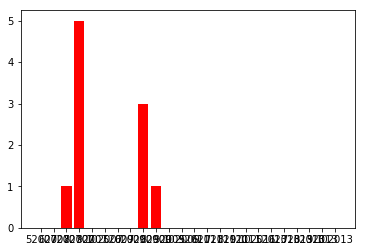

In [372]:
plt.bar(x = range(len(h)), height = h, color = 'r', tick_label = subset['x']);

In [370]:
len(subset['x'])

24

In [369]:
len(subset['number'])

24

In [387]:
df[['spec','wnv']].groupby(['spec']).max()

,wnv
spec,
CULEX ERRATICUS,0.0
CULEX PIPIENS,1.0
CULEX PIPIENS/RESTUANS,1.0
CULEX RESTUANS,1.0
CULEX SALINARIUS,0.0
CULEX TARSALIS,0.0
CULEX TERRITANS,0.0


In [402]:
df[(df['spec'] == 'CULEX PIPIENS/RESTUANS')|(df['spec'] == 'CULEX PIPIENS')|(df['spec'] == 'CULEX RESTUANS')][['year','month','spec','wnv']].groupby(['year','month','spec']).max()

wnv
year month spec                       
2007 5     CULEX PIPIENS           0.0
           CULEX PIPIENS/RESTUANS  0.0
           CULEX RESTUANS          0.0
     6     CULEX PIPIENS           0.0
           CULEX PIPIENS/RESTUANS  0.0
           CULEX RESTUANS          0.0
     7     CULEX PIPIENS           1.0
           CULEX PIPIENS/RESTUANS  1.0
           CULEX RESTUANS          0.0
     8     CULEX PIPIENS           1.0
           CULEX PIPIENS/RESTUANS  1.0
           CULEX RESTUANS          1.0
     9     CULEX PIPIENS           0.0
           CULEX PIPIENS/RESTUANS  0.0
           CULEX RESTUANS          0.0
     10    CULEX PIPIENS           0.0
           CULEX PIPIENS/RESTUANS  1.0
           CULEX RESTUANS          1.0
2009 5     CULEX PIPIENS           0.0
           CULEX PIPIENS/RESTUANS  0.0
           CULEX RESTUANS          0.0
     6     CULEX PIPIENS           0.0
           CULEX PIPIENS/RESTUANS  1.0
           CULEX RESTUANS          1.0
     7     CULEX PIPIENS           0.0
           CULEX PIPIENS/RESTUANS  0.0
           CULEX RESTUANS          1.0
     8     CULEX PIPIENS           0.0
           CULEX PIPIENS/RESTUANS  1.0
           CULEX RESTUANS          1.0
     9     CULEX PIPIENS           1.0
           CULEX PIPIENS/RESTUANS  1.0
           CULEX RESTUANS          1.0
     10    CULEX PIPIENS           0.0
           CULEX PIPIENS/RESTUANS  1.0
           CULEX RESTUANS          0.0
2011 5     CULEX PIPIENS           0.0
           CULEX PIPIENS/RESTUANS  0.0
           CULEX RESTUANS          0.0
     6     CULEX PIPIENS           1.0
           CULEX PIPIENS/RESTUANS  1.0
           CULEX RESTUANS          1.0
     7     CULEX PIPIENS           0.0
           CULEX PIPIENS/RESTUANS  1.0
           CULEX RESTUANS          1.0
     8     CULEX PIPIENS           1.0
           CULEX PIPIENS/RESTUANS  1.0
           CULEX RESTUANS          1.0
     9     CULEX PIPIENS           1.0
           CULEX PIPIENS/RESTUANS  1.0
           CULEX RESTUANS          1.0
     10    CULEX PIPIENS           0.0
           CULEX PIPIENS/RESTUANS  0.0
           CULEX RESTUANS          0.0
2013 5     CULEX PIPIENS           0.0
           CULEX PIPIENS/RESTUANS  0.0
           CULEX RESTUANS          0.0
     6     CULEX PIPIENS           1.0
           CULEX PIPIENS/RESTUANS  1.0
           CULEX RESTUANS          1.0
     7     CULEX PIPIENS           0.0
           CULEX PIPIENS/RESTUANS  0.0
           CULEX RESTUANS          0.0
     8     CULEX PIPIENS           0.0
           CULEX PIPIENS/RESTUANS  0.0
           CULEX RESTUANS          0.0
     9     CULEX PIPIENS           0.0
           CULEX PIPIENS/RESTUANS  0.0
           CULEX RESTUANS          0.0
     10    CULEX PIPIENS           0.0
           CULEX PIPIENS/RESTUANS  0.0
           CULEX RESTUANS          0.0

In [435]:
slice = X_k_train[X_k_train['Species']=='CULEX RESTUANS'].groupby(['Date','Trap']).max()

In [436]:
slice.head()

Species   Latitude  Longitude  NumMosquitos  \
Date       Trap                                                       
2007-05-29 T002  CULEX RESTUANS  41.954690 -87.800991             1   
           T007  CULEX RESTUANS  41.994991 -87.769279             1   
           T015  CULEX RESTUANS  41.974089 -87.824812             4   
           T045  CULEX RESTUANS  41.921600 -87.666455             2   
           T046  CULEX RESTUANS  41.891118 -87.654491             1   

                                        lat_long  Y  
Date       Trap                                      
2007-05-29 T002           (41.95469, -87.800991)  0  
           T007          (41.994991, -87.769279)  0  
           T015          (41.974089, -87.824812)  0  
           T045            (41.9216, -87.666455)  0  
           T046  (41.891118, -87.65449100000001)  0

In [437]:
slice['Y'].sum()

48

In [438]:
len(slice)

2172

In [439]:
48/(136*81)

0.004357298474945534

In [467]:
bytrap = df.groupby(['trap','year'], as_index=False).max()

In [468]:
bytrap.head()

,trap,year,month,spec,number,wnv
0,T001,2007,10,CULEX TERRITANS,9.0,0.0
1,T001,2009,10,CULEX TERRITANS,0.0,0.0
2,T001,2011,10,CULEX TERRITANS,0.0,0.0
3,T001,2013,10,CULEX TERRITANS,0.0,0.0
4,T002,2007,10,CULEX TERRITANS,397.0,1.0


In [469]:
slice2 = bytrap.groupby('trap',as_index=False, ).sum()

In [447]:
bytrap[mask]

ValueError: Item wrong length 136 instead of 544.

In [470]:
slice2.head()

,trap,year,month,number,wnv
0,T001,8040,40,9.0,0.0
1,T002,8040,40,1442.0,3.0
2,T003,8040,40,467.0,4.0
3,T004,8040,40,45.0,0.0
4,T005,8040,40,23.0,1.0


In [472]:
zerotraps = list(slice2[slice2['wnv']==0]['trap'])

In [473]:
zerotraps

['T001',
 'T004',
 'T007',
 'T017',
 'T018',
 'T019',
 'T025',
 'T034',
 'T040',
 'T043',
 'T044',
 'T046',
 'T050',
 'T051',
 'T060',
 'T071',
 'T072',
 'T075',
 'T076',
 'T078',
 'T088',
 'T092',
 'T094B',
 'T099',
 'T100',
 'T129',
 'T141',
 'T146',
 'T148',
 'T149',
 'T150',
 'T153',
 'T157',
 'T161',
 'T206',
 'T219',
 'T229',
 'T237',
 'T238']

In [474]:
X_k_test.head()

,Id,Species,Trap,Latitude,Longitude,lat_long
Date,,,,,,
2008-06-11,1,CULEX PIPIENS/RESTUANS,T002,41.95469,-87.800991,"(41.95469, -87.800991)"
2008-06-11,2,CULEX RESTUANS,T002,41.95469,-87.800991,"(41.95469, -87.800991)"
2008-06-11,3,CULEX PIPIENS,T002,41.95469,-87.800991,"(41.95469, -87.800991)"
2008-06-11,4,CULEX SALINARIUS,T002,41.95469,-87.800991,"(41.95469, -87.800991)"
2008-06-11,5,CULEX TERRITANS,T002,41.95469,-87.800991,"(41.95469, -87.800991)"


In [475]:
X_k_test['wnv'] = 1

In [478]:
for each in range(len(X_k_test)):
    if (X_k_test.iloc[each,1] == "CULEX PIPIENS/RESTUANS") |(X_k_test.iloc[each,1] == "CULEX PIPIENS")|(X_k_test.iloc[each,1] == "CULEX RESTUANS"):
        pass
    else:
        X_k_test.iloc[each,6] = 0
        
    if X_k_test.iloc[each,2] == 0 in zerotraps:
        X_k_test.iloc[each,6] = 0
    

In [479]:
X_k_test['wnv'].mean()

0.3830841065240384

In [481]:
X_k_train['Y'].mean()

0.05392330383480826

In [489]:
kaggle_out = pd.DataFrame(X_k_test['Id'])

In [490]:
kaggle_out['WnvPresent'] = 0

In [487]:
kaggle_out.head()

,Id,WnvPresent
Date,,
2008-06-11,1,1
2008-06-11,2,1
2008-06-11,3,1
2008-06-11,4,0
2008-06-11,5,0


In [491]:
kaggle_out.to_csv('../data/sub002.cvs', index=False)

In [592]:
y = pd.DataFrame({
    'WnvPresent':Y_k
})

In [577]:
Y_k.head()

0    0
1    0
2    0
3    0
4    0
Name: WnvPresent, dtype: int64

In [599]:
X_k_train.drop('lat_long', axis = 1, inplace=True)

In [626]:
X_k_train.drop('NumMosquitos', axis = 1, inplace=True)

In [657]:
def remove_text(val_in):
    val_out = val_in.replace('T','')
    val_out = val_out.replace('A','1')
    val_out = val_out.replace('C','3')
    val_out = val_out.replace('B','2')
    return(val_out)

In [613]:
X_k_train['Trap']=X_k_train['Trap'].map(remove_text)

In [658]:
X_k_test['Trap']=X_k_test['Trap'].map(remove_text)

In [630]:
X_k_train = pd.get_dummies(X_k_train, columns = ['Species'], drop_first = False)

In [629]:
X_k_test=pd.get_dummies(X_k_test, columns=['Species'], drop_first = False)

In [642]:
def getmonth(date_in):
    return(date_in.month)

def getyear(date_in):
    return(date_in.year)

In [643]:
X_k_train['month'] = X_k_train['Date'].map(getmonth)
X_k_train['year'] = X_k_train['Date'].map(getyear)

In [644]:
X_k_test['month'] = X_k_test['Date'].map(getmonth)
X_k_test['year'] = X_k_test['Date'].map(getyear)

In [645]:
X_k_train.drop('Date', axis = 1, inplace = True)
X_k_test.drop('Date', axis = 1, inplace = True)

In [646]:
X_train, X_test, y_train, y_test = train_test_split(X_k_train, y)

In [647]:
X_k_train.head()

,Trap,Latitude,Longitude,Species_CULEX ERRATICUS,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,month,year
0,002,41.954690,-87.800991,0,0,1,0,0,0,0,5,2007
1,002,41.954690,-87.800991,0,0,0,1,0,0,0,5,2007
2,007,41.994991,-87.769279,0,0,0,1,0,0,0,5,2007
3,015,41.974089,-87.824812,0,0,1,0,0,0,0,5,2007
4,015,41.974089,-87.824812,0,0,0,1,0,0,0,5,2007


In [654]:
X_k_test.head()

,Id,Trap,Latitude,Longitude,lat_long,Species_CULEX ERRATICUS,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Species_UNSPECIFIED CULEX,month,year
0,1,002,41.95469,-87.800991,"(41.95469, -87.800991)",0,0,1,0,0,0,0,0,6,2008
1,2,002,41.95469,-87.800991,"(41.95469, -87.800991)",0,0,0,1,0,0,0,0,6,2008
2,3,002,41.95469,-87.800991,"(41.95469, -87.800991)",0,1,0,0,0,0,0,0,6,2008
3,4,002,41.95469,-87.800991,"(41.95469, -87.800991)",0,0,0,0,1,0,0,0,6,2008
4,5,002,41.95469,-87.800991,"(41.95469, -87.800991)",0,0,0,0,0,0,1,0,6,2008


In [648]:

dt = DecisionTreeClassifier()

In [649]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [650]:
dt.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0])

In [651]:
dt.score(X_test, y_test)

0.9362907031618688

In [652]:
dt.score(X_train, y_train)

0.9543738200125865

In [661]:
dt.predict(X_k_test.drop(['Id','lat_long', 'Species_UNSPECIFIED CULEX'], axis = 1))

array([0, 0, 0, ..., 0, 0, 0])

In [662]:
kaggle_out['WnvPresent'] = dt.predict(X_k_test.drop(['Id','lat_long', 'Species_UNSPECIFIED CULEX'], axis = 1))

In [663]:
kaggle_out.to_csv('../data/sub003.cvs', index=False)

In [58]:
df = pd.read_csv('../data/train_sum.csv')

In [59]:
df.head()

,trap,year,month,spec,number,wnv
0,T002,2007,5,CULEX SALINARIUS,0.0,0.0
1,T002,2007,5,CULEX TARSALIS,0.0,0.0
2,T002,2007,5,CULEX PIPIENS,0.0,0.0
3,T002,2007,5,CULEX RESTUANS,1.0,0.0
4,T002,2007,5,CULEX TERRITANS,0.0,0.0


In [61]:
df.groupby('month').sum()

,year,number,wnv
month,,,
5,7654080,337.0,0.0
6,7654080,12241.0,66.0
7,7654080,29100.0,22.0
8,7654080,65670.0,150.0
9,7654080,23523.0,89.0
10,7654080,4168.0,9.0
